Importing required libraries

In [1]:
# All the required libraries are imported
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import wordcloud as wc
import sweetviz

Data Import

In [2]:
# The dataset is imported
uc_data = pd.read_csv('archive/DataScientist.csv')

Data Overview

In [3]:
uc_data.head()

Unnamed: 0  index                          Job Title  \
0           0      0              Senior Data Scientist   
1           1      1  Data Scientist, Product Analytics   
2           2      2               Data Science Manager   
3           3      3                       Data Analyst   
4           4      4             Director, Data Science   

                Salary Estimate  \
0  $111K-$181K (Glassdoor est.)   
1  $111K-$181K (Glassdoor est.)   
2  $111K-$181K (Glassdoor est.)   
3  $111K-$181K (Glassdoor est.)   
4  $111K-$181K (Glassdoor est.)   

                                     Job Description  Rating  \
0  ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...     3.5   
1  At Noom, we use scientifically proven methods ...     4.5   
2  Decode_M\n\nhttps://www.decode-m.com/\n\nData ...    -1.0   
3  Sapphire Digital seeks a dynamic and driven mi...     3.4   
4  Director, Data Science - (200537)\nDescription...     3.4   

                      Company Name       Location      Headquarters  \
0                      Hopper\n3.5   New York, NY  Montreal, Canada   
1                     Noom US\n4.5   New York, NY      New York, NY   
2                         Decode_M   New York, NY      New York, NY   
3            Sapphire Digital\n3.4  Lyndhurst, NJ     Lyndhurst, NJ   
4  United Entertainment Group\n3.4   New York, NY      New York, NY   

                     Size  Founded  Type of ownership  \
0   501 to 1000 employees     2007  Company - Private   
1  1001 to 5000 employees     2008  Company - Private   
2       1 to 50 employees       -1            Unknown   
3    201 to 500 employees     2019  Company - Private   
4     51 to 200 employees     2007  Company - Private   

                    Industry                  Sector  \
0            Travel Agencies        Travel & Tourism   
1  Health, Beauty, & Fitness       Consumer Services   
2                         -1                      -1   
3                   Internet  Information Technology   
4    Advertising & Marketing       Business Services   

                    Revenue               Competitors Easy Apply  
0  Unknown / Non-Applicable                        -1         -1  
1  Unknown / Non-Applicable                        -1         -1  
2  Unknown / Non-Applicable                        -1       True  
3  Unknown / Non-Applicable      Zocdoc, Healthgrades         -1  
4  Unknown / Non-Applicable  BBDO, Grey Group, Droga5         -1

In [4]:
uc_data.tail()

Unnamed: 0  index                                          Job Title  \
3904        3904   4375                                  AWS Data Engineer   
3905        3905   4376                              Data Analyst â Junior   
3906        3906   4377                   Security Analytics Data Engineer   
3907        3907   4378                   Security Analytics Data Engineer   
3908        3908   4379  Patient Safety Physician or Safety Scientist -...   

                  Salary Estimate  \
3904  $55K-$112K (Glassdoor est.)   
3905  $55K-$112K (Glassdoor est.)   
3906  $55K-$112K (Glassdoor est.)   
3907  $55K-$112K (Glassdoor est.)   
3908  $55K-$112K (Glassdoor est.)   

                                        Job Description  Rating  \
3904  About Us\n\nTachyon Technologies is a Digital ...     4.4   
3905  Job description\nInterpret data, analyze resul...     5.0   
3906  Job DescriptionThe Security Analytics Data Eng...     3.8   
3907  The Security Analytics Data Engineer will inte...     4.0   
3908  Help us transform patients' lives.\nAt UCB, we...     3.7   

                               Company Name      Location      Headquarters  \
3904              Tachyon Technologies\n4.4    Dublin, OH        Irving, TX   
3905  Staffigo Technical Services, LLC\n5.0  Columbus, OH     Woodridge, IL   
3906                    PDS Tech, Inc.\n3.8    Dublin, OH        Irving, TX   
3907        Data Resource Technologies\n4.0    Dublin, OH         Omaha, NE   
3908                               UCB\n3.7    Slough, OH  Brussel, Belgium   

                         Size  Founded  Type of ownership  \
3904     201 to 500 employees     2011  Company - Private   
3905      51 to 200 employees     2008  Company - Private   
3906  5001 to 10000 employees     1977  Company - Private   
3907        1 to 50 employees       -1  Company - Private   
3908  5001 to 10000 employees       -1   Company - Public   

                       Industry                     Sector  \
3904                IT Services     Information Technology   
3905                IT Services     Information Technology   
3906     Staffing & Outsourcing          Business Services   
3907                 Accounting         Accounting & Legal   
3908  Biotech & Pharmaceuticals  Biotech & Pharmaceuticals   

                         Revenue Competitors Easy Apply  
3904    $10 to $25 million (USD)          -1         -1  
3905   $50 to $100 million (USD)          -1         -1  
3906  $100 to $500 million (USD)          -1         -1  
3907  Less than $1 million (USD)          -1         -1  
3908      $2 to $5 billion (USD)      AbbVie         -1

In [5]:
uc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3909 entries, 0 to 3908
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3909 non-null   int64  
 1   index              3909 non-null   int64  
 2   Job Title          3909 non-null   object 
 3   Salary Estimate    3909 non-null   object 
 4   Job Description    3909 non-null   object 
 5   Rating             3909 non-null   float64
 6   Company Name       3909 non-null   object 
 7   Location           3909 non-null   object 
 8   Headquarters       3909 non-null   object 
 9   Size               3909 non-null   object 
 10  Founded            3909 non-null   int64  
 11  Type of ownership  3909 non-null   object 
 12  Industry           3909 non-null   object 
 13  Sector             3909 non-null   object 
 14  Revenue            3909 non-null   object 
 15  Competitors        3909 non-null   object 
 16  Easy Apply         3909 

In [6]:
uc_data.describe()

Unnamed: 0        index       Rating      Founded
count  3909.000000  3909.000000  3909.000000  3909.000000
mean   1954.000000  2167.446662     3.283576  1479.154771
std    1128.575429  1247.657849     1.575749   855.750138
min       0.000000     0.000000    -1.000000    -1.000000
25%     977.000000  1121.000000     3.200000  1625.000000
50%    1954.000000  2161.000000     3.700000  1976.000000
75%    2931.000000  3249.000000     4.100000  2002.000000
max    3908.000000  4379.000000     5.000000  2020.000000

In [7]:
uc_data.shape

(3909, 17)

In [8]:
uc_data.columns

Index(['Unnamed: 0', 'index', 'Job Title', 'Salary Estimate',
       'Job Description', 'Rating', 'Company Name', 'Location', 'Headquarters',
       'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'Competitors', 'Easy Apply'],
      dtype='object')

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)



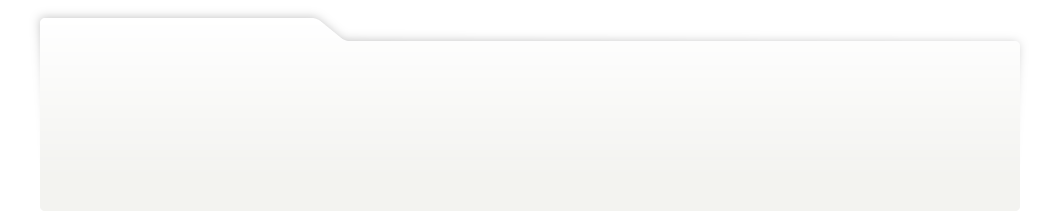
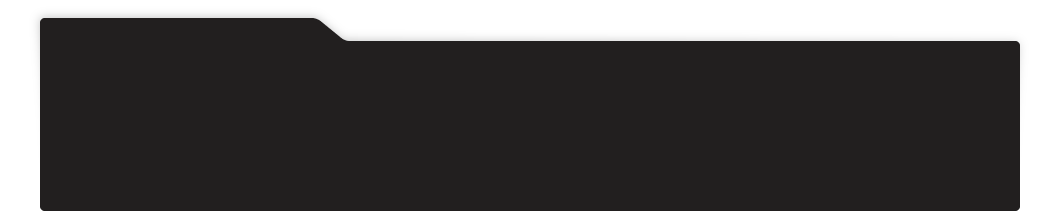
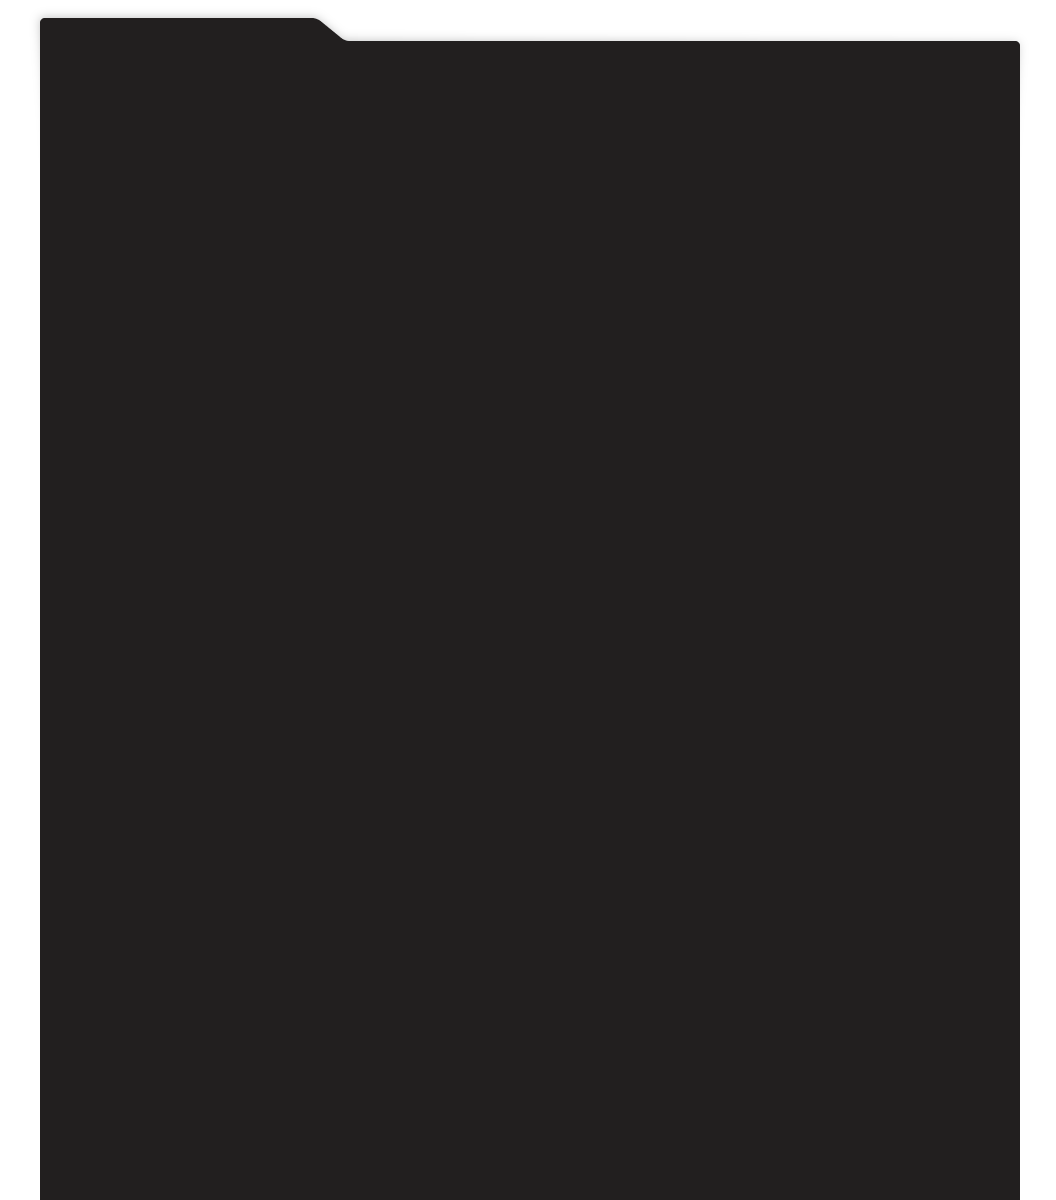
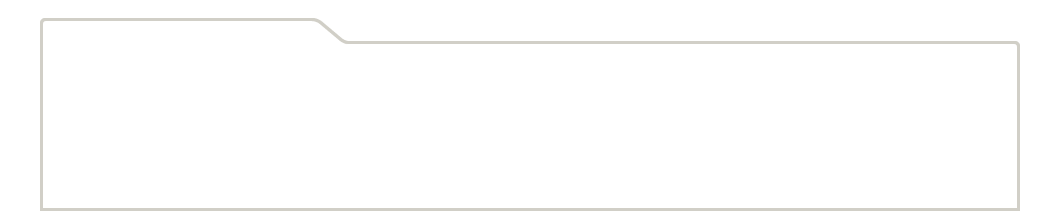
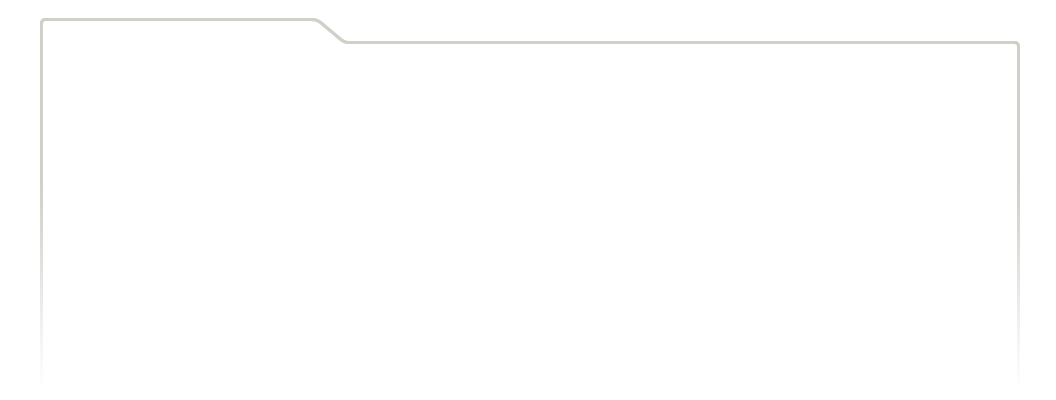
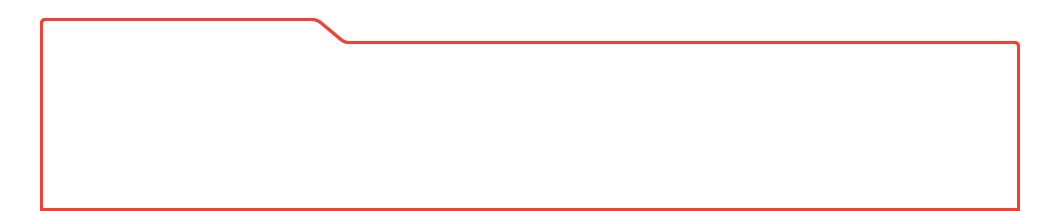
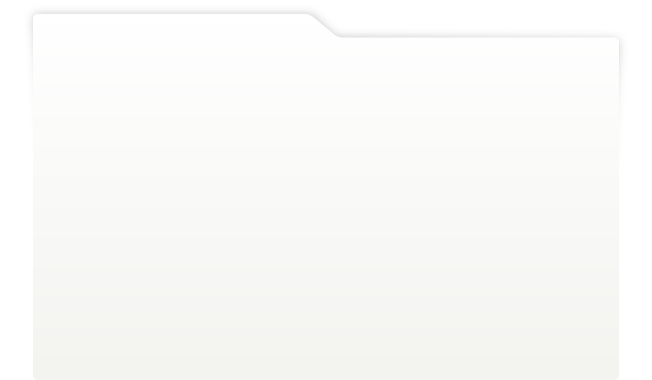
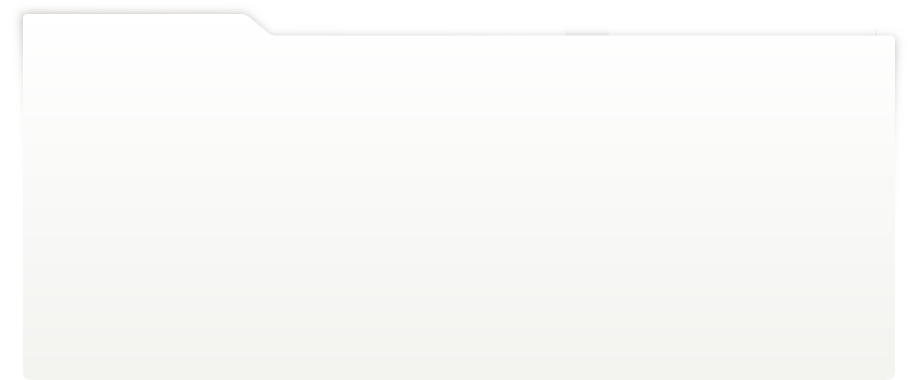
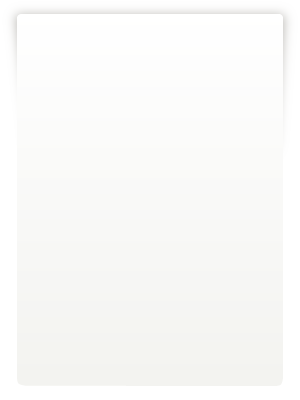
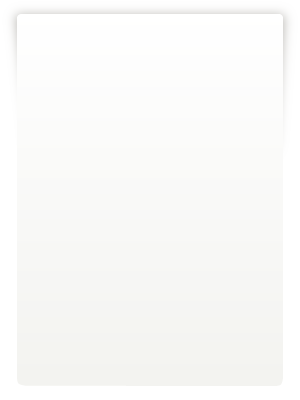
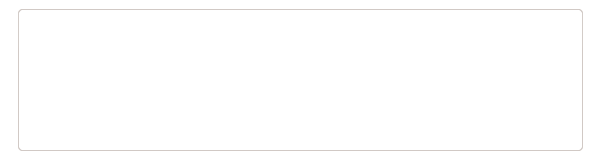
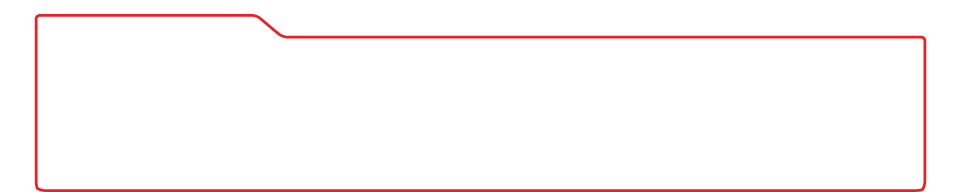
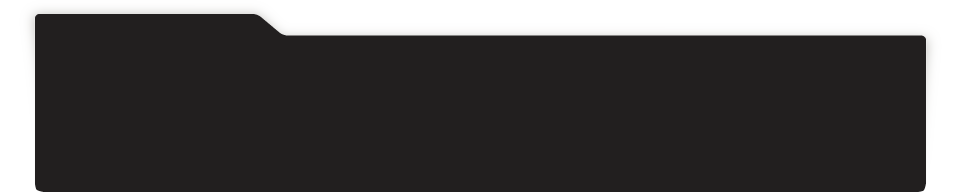
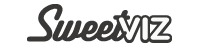
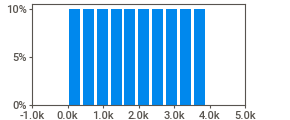
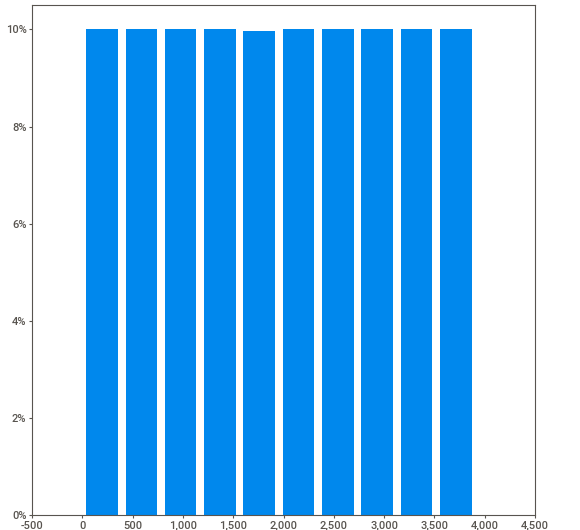
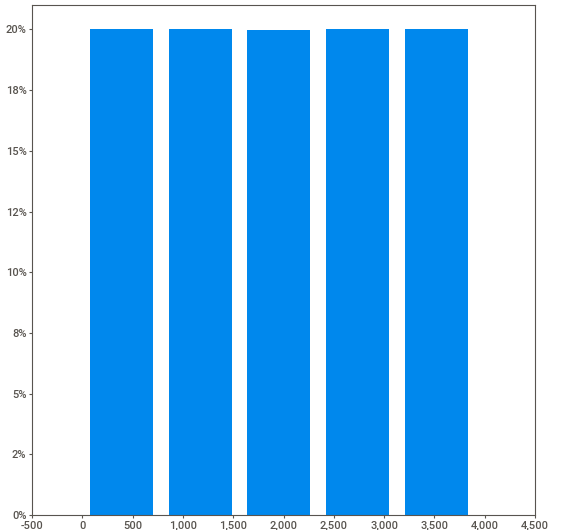
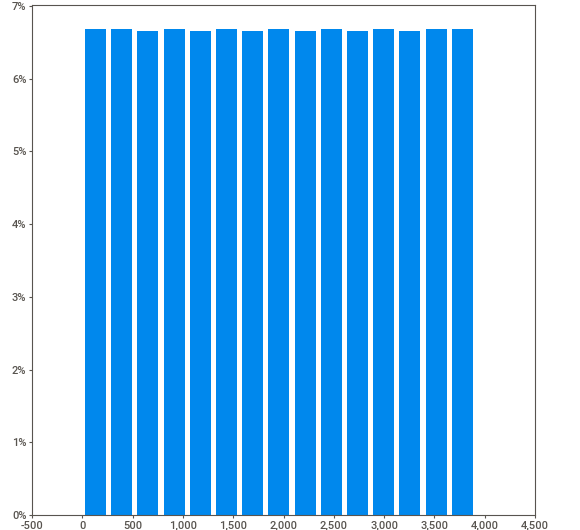
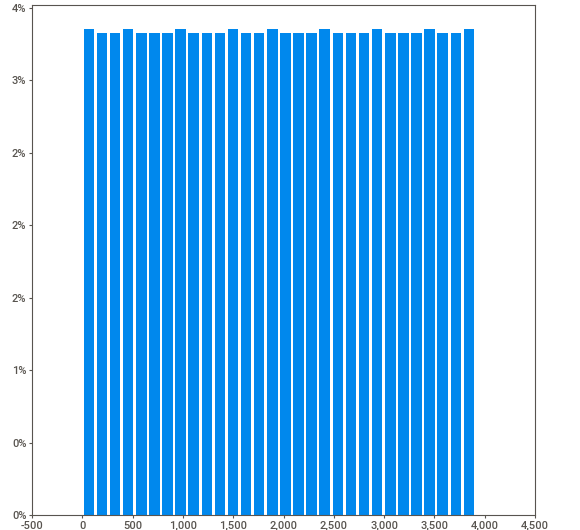
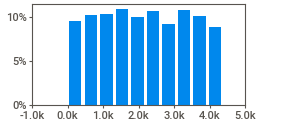
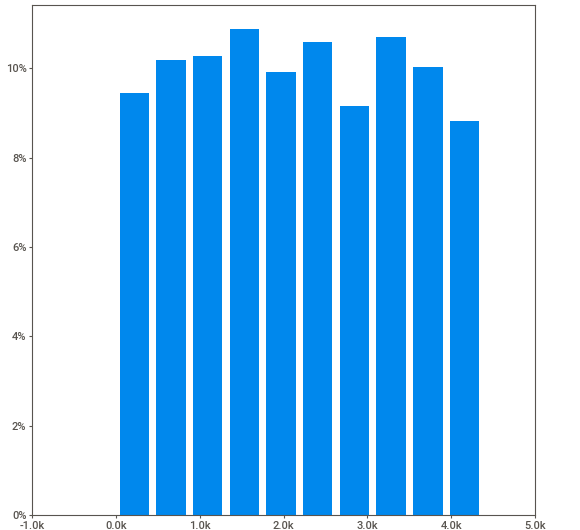
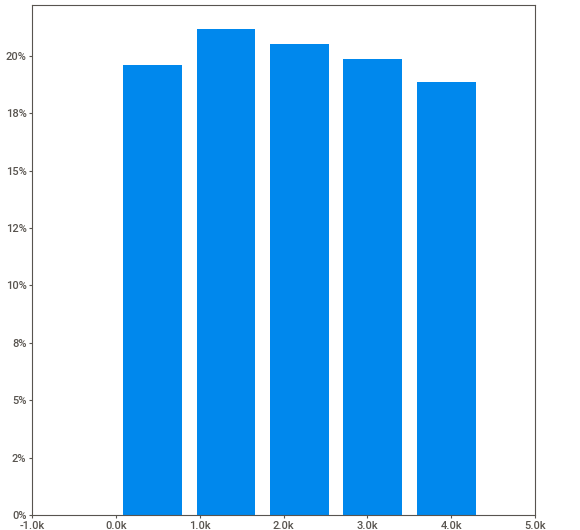
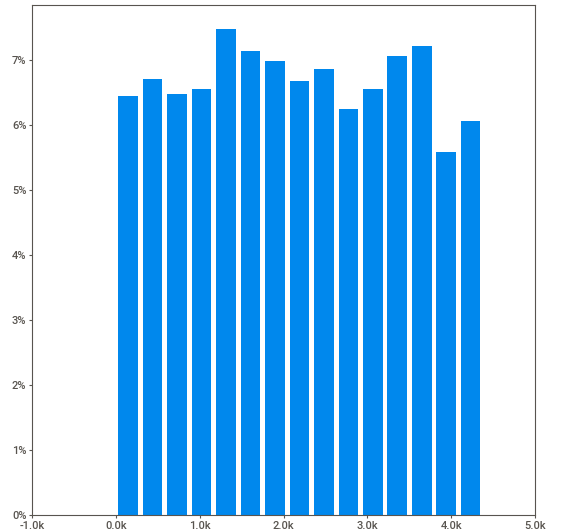
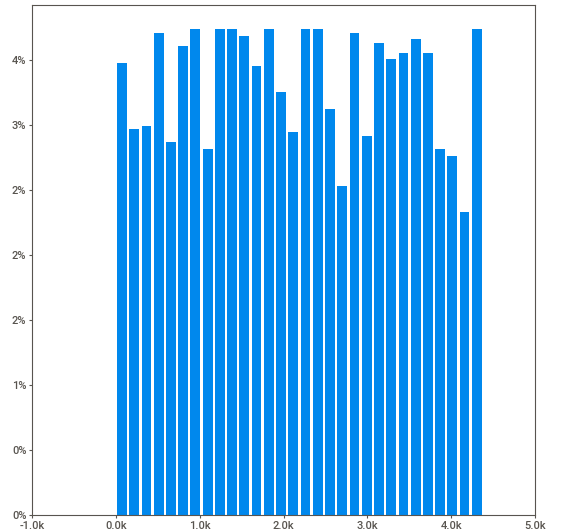
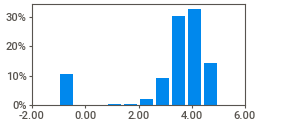
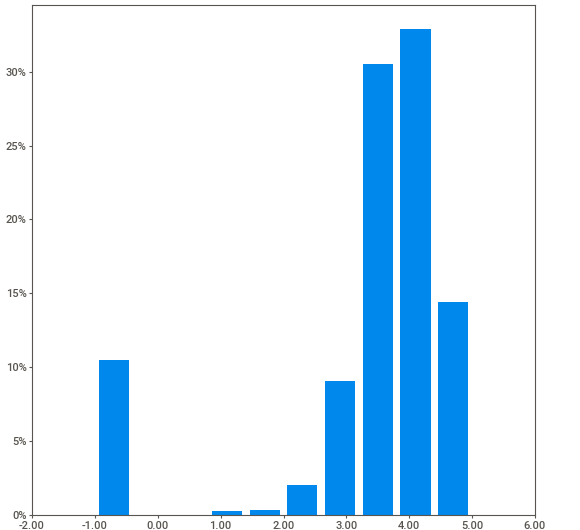
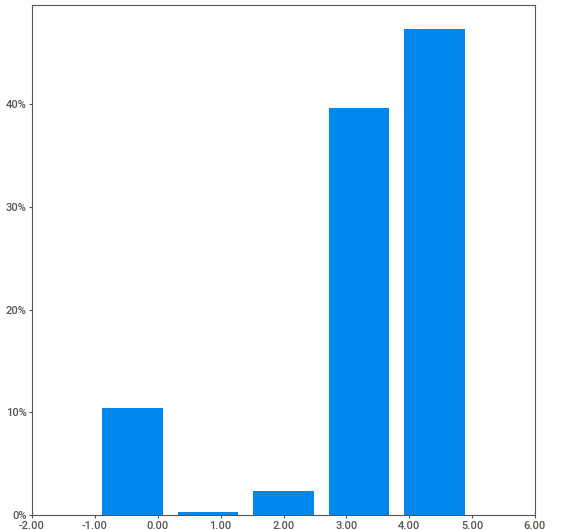
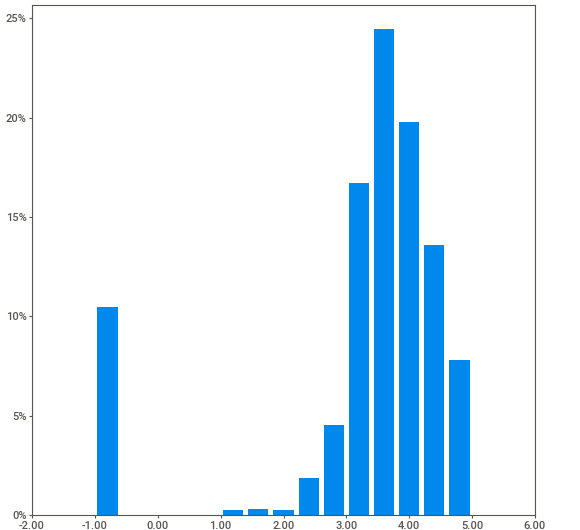
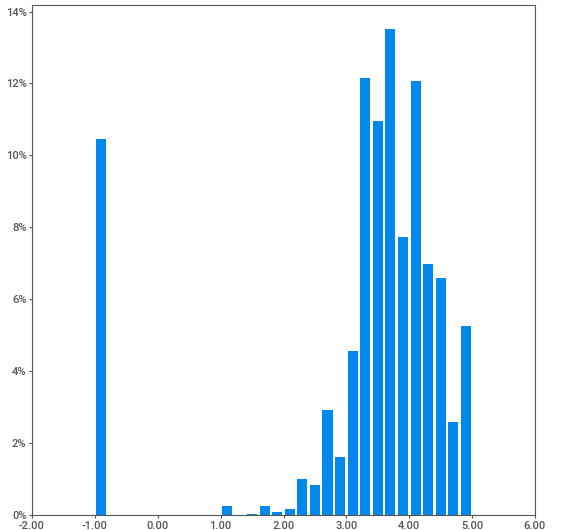
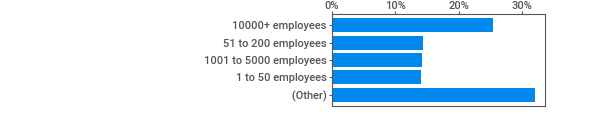
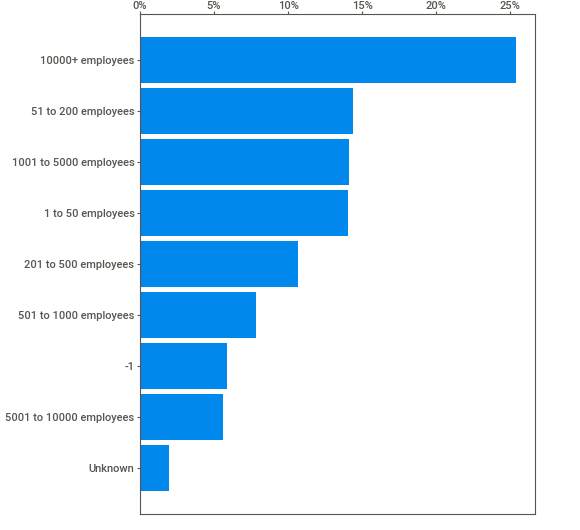
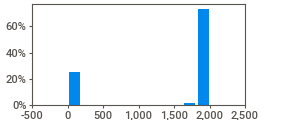
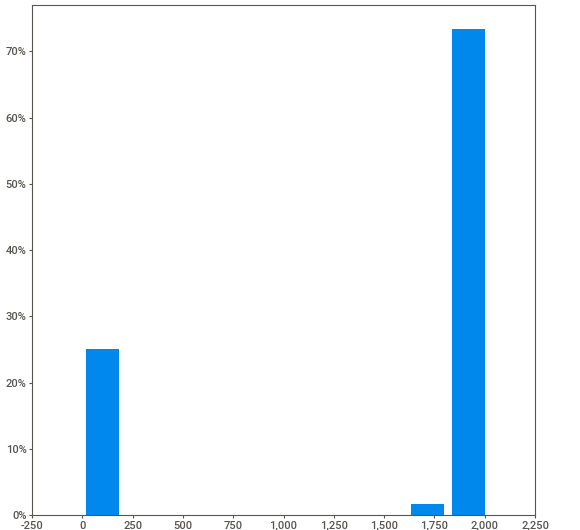
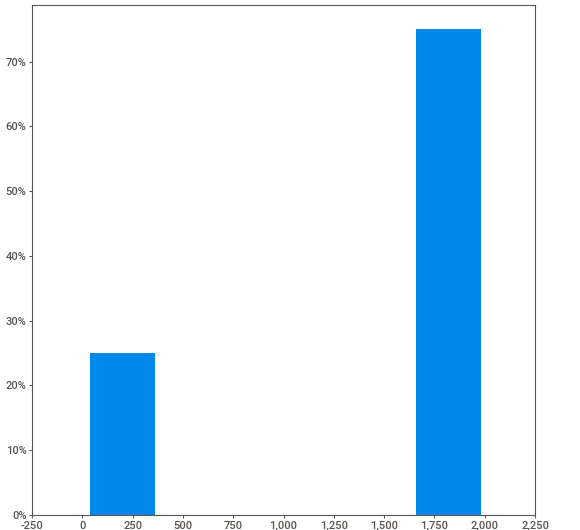
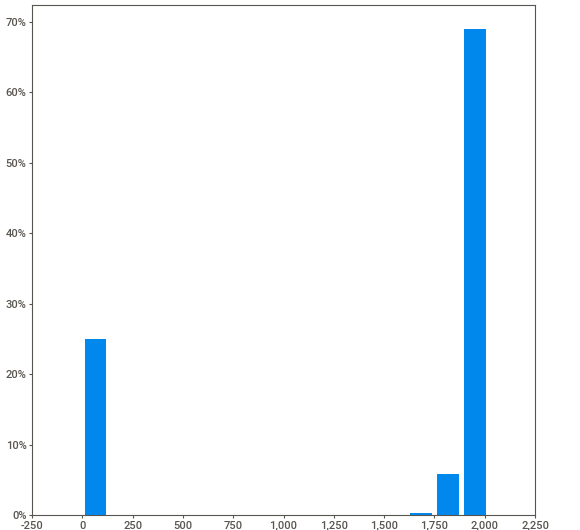
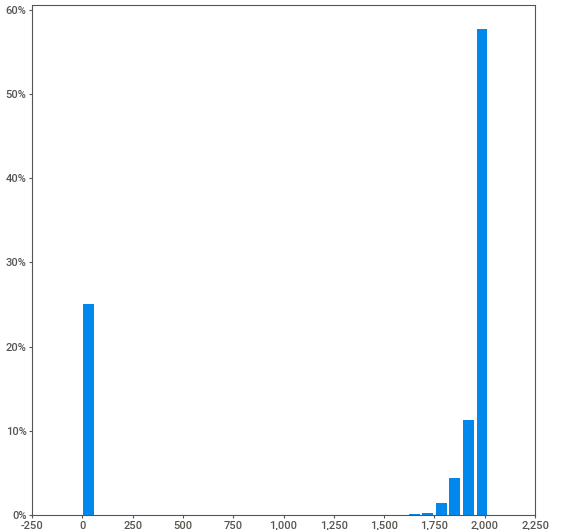
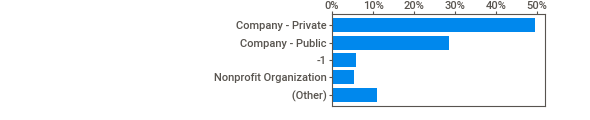
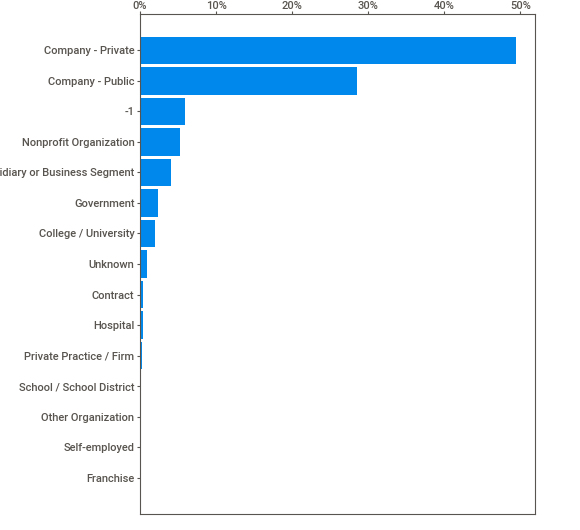
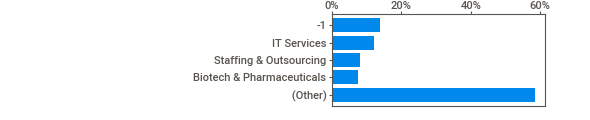
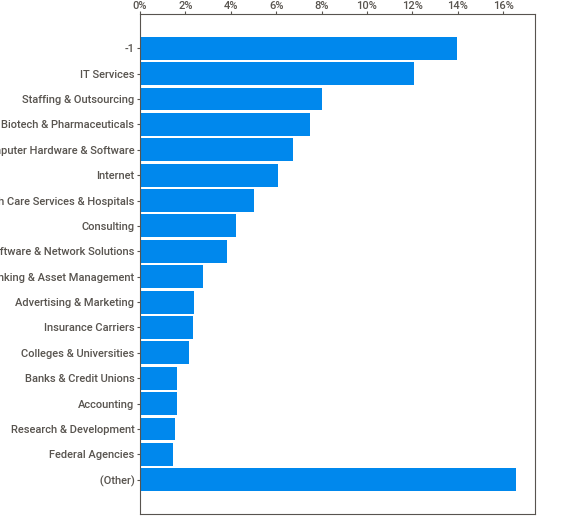
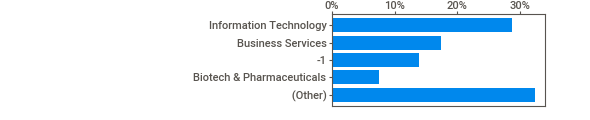
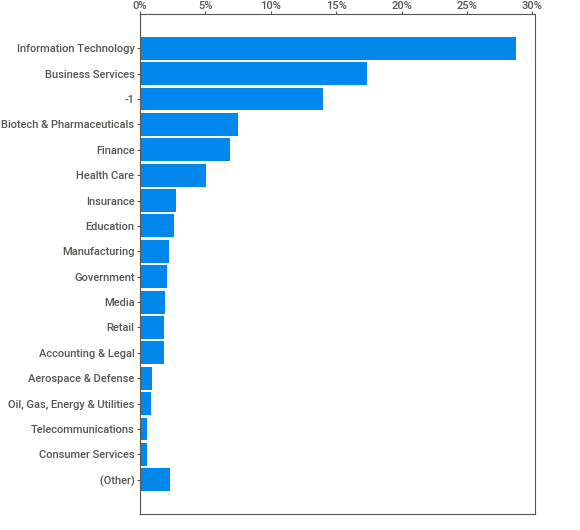
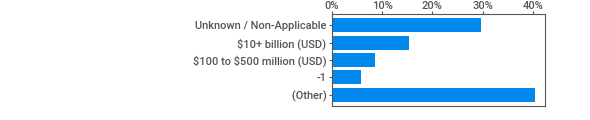
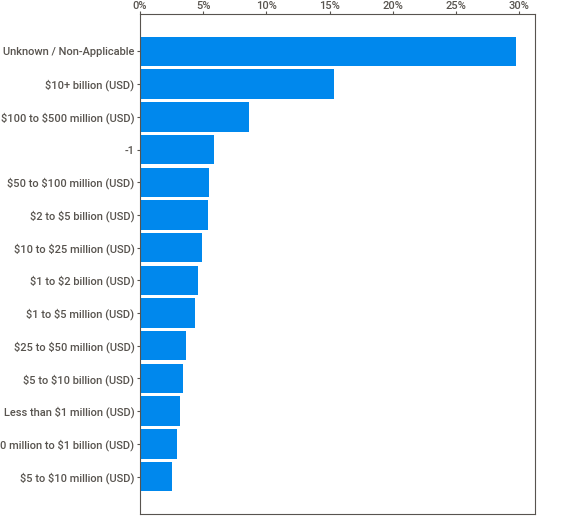
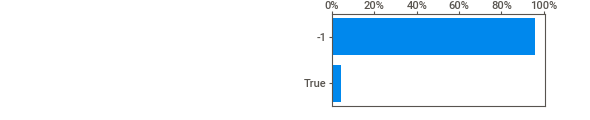
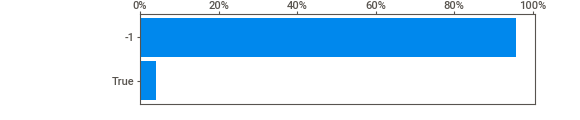
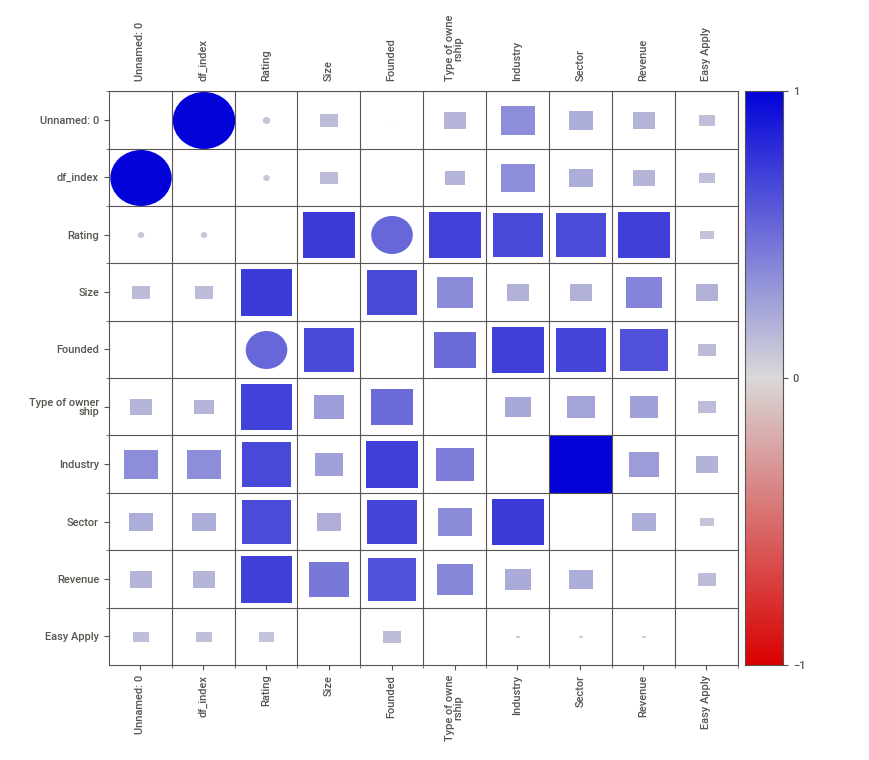
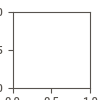

In [10]:
# This function call generates a full pledged data overview dashboard
my_report  = sweetviz.analyze([uc_data, 'Dataset Overview']) #/ Takes dataset as the argument
my_report.show_notebook()

Data Cleaning

In [11]:
# Dropping unnecessary columns
drop_cols = ['index', 'Unnamed: 0']
uc_data.drop(drop_cols, axis=1, inplace=True)

In [12]:
# Replacing irrelevant values with relevant values
uc_data = uc_data.replace('-1', np.nan)
uc_data = uc_data.replace(-1, np.nan)
uc_data = uc_data.replace(-1.0, np.nan)
uc_data['Easy Apply'] = uc_data['Easy Apply'].fillna(False).astype('bool')
uc_data['Revenue'] = uc_data['Revenue'].replace('Unknown / Non-Applicable', np.nan)

Job Title               Salary Estimate  \
0              Senior Data Scientist  $111K-$181K (Glassdoor est.)   
1  Data Scientist, Product Analytics  $111K-$181K (Glassdoor est.)   
2               Data Science Manager  $111K-$181K (Glassdoor est.)   
3                       Data Analyst  $111K-$181K (Glassdoor est.)   
4             Director, Data Science  $111K-$181K (Glassdoor est.)   

                                     Job Description  Rating  \
0  ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...     3.5   
1  At Noom, we use scientifically proven methods ...     4.5   
2  Decode_M\n\nhttps://www.decode-m.com/\n\nData ...     NaN   
3  Sapphire Digital seeks a dynamic and driven mi...     3.4   
4  Director, Data Science - (200537)\nDescription...     3.4   

                      Company Name       Location      Headquarters  \
0                      Hopper\n3.5   New York, NY  Montreal, Canada   
1                     Noom US\n4.5   New York, NY      New York, NY   
2                         Decode_M   New York, NY      New York, NY   
3            Sapphire Digital\n3.4  Lyndhurst, NJ     Lyndhurst, NJ   
4  United Entertainment Group\n3.4   New York, NY      New York, NY   

                     Size  Founded  Type of ownership  \
0   501 to 1000 employees   2007.0  Company - Private   
1  1001 to 5000 employees   2008.0  Company - Private   
2       1 to 50 employees      NaN            Unknown   
3    201 to 500 employees   2019.0  Company - Private   
4     51 to 200 employees   2007.0  Company - Private   

                    Industry                  Sector Revenue  \
0            Travel Agencies        Travel & Tourism     NaN   
1  Health, Beauty, & Fitness       Consumer Services     NaN   
2                        NaN                     NaN     NaN   
3                   Internet  Information Technology     NaN   
4    Advertising & Marketing       Business Services     NaN   

                Competitors  Easy Apply  
0                       NaN       False  
1                       NaN       False  
2                       NaN        True  
3      Zocdoc, Healthgrades       False  
4  BBDO, Grey Group, Droga5       False

In [13]:
# Extracting company name from Rating values
uc_data['Company Name'],_=uc_data['Company Name'].str.split('\n', 1).str

C:\Users\chack\AppData\Local\Temp/ipykernel_33444/2305708528.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  uc_data['Company Name'],_=uc_data['Company Name'].str.split('\n', 1).str


In [14]:
# Removing unnecessary words
uc_data['Salary Estimate'],_=uc_data['Salary Estimate'].str.split('(', 1).str

C:\Users\chack\AppData\Local\Temp/ipykernel_33444/1489423883.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  uc_data['Salary Estimate'],_=uc_data['Salary Estimate'].str.split('(', 1).str


In [15]:
uc_data['Location'], uc_data['State/Country'] = uc_data['Location'].str.split(',').str

C:\Users\chack\AppData\Local\Temp/ipykernel_33444/998529594.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  uc_data['Location'], uc_data['State/Country'] = uc_data['Location'].str.split(',').str


In [16]:
for val in range(uc_data.shape[0]):
    if ',' in uc_data.loc[val, 'Job Title']:
        uc_data.loc[val, 'Job Title'], _ = uc_data.loc[val, 'Job Title'].split(',', 1)

    uc_data.loc[val, 'Job Title'] = uc_data.loc[val, 'Job Title'].replace('Sr.', 'Senior')
    uc_data.loc[val, 'Job Title'] = uc_data.loc[val, 'Job Title'].replace('Jr.', 'Junior')

In [17]:
uc_data.head()

Job Title Salary Estimate  \
0  Senior Data Scientist    $111K-$181K    
1         Data Scientist    $111K-$181K    
2   Data Science Manager    $111K-$181K    
3           Data Analyst    $111K-$181K    
4               Director    $111K-$181K    

                                     Job Description  Rating  \
0  ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...     3.5   
1  At Noom, we use scientifically proven methods ...     4.5   
2  Decode_M\n\nhttps://www.decode-m.com/\n\nData ...     NaN   
3  Sapphire Digital seeks a dynamic and driven mi...     3.4   
4  Director, Data Science - (200537)\nDescription...     3.4   

                 Company Name   Location      Headquarters  \
0                      Hopper   New York  Montreal, Canada   
1                     Noom US   New York      New York, NY   
2                    Decode_M   New York      New York, NY   
3            Sapphire Digital  Lyndhurst     Lyndhurst, NJ   
4  United Entertainment Group   New York      New York, NY   

                     Size  Founded  Type of ownership  \
0   501 to 1000 employees   2007.0  Company - Private   
1  1001 to 5000 employees   2008.0  Company - Private   
2       1 to 50 employees      NaN            Unknown   
3    201 to 500 employees   2019.0  Company - Private   
4     51 to 200 employees   2007.0  Company - Private   

                    Industry                  Sector Revenue  \
0            Travel Agencies        Travel & Tourism     NaN   
1  Health, Beauty, & Fitness       Consumer Services     NaN   
2                        NaN                     NaN     NaN   
3                   Internet  Information Technology     NaN   
4    Advertising & Marketing       Business Services     NaN   

                Competitors  Easy Apply State/Country  
0                       NaN       False            NY  
1                       NaN       False            NY  
2                       NaN        True            NY  
3      Zocdoc, Healthgrades       False            NJ  
4  BBDO, Grey Group, Droga5       False            NY

Data Organization

In [21]:
# Extracting Starting and Highest Salaries from Salary Estimate column
uc_data['Starting Salary'], uc_data['Highest Salary'] = uc_data['Salary Estimate'].str.split('-').str
uc_data['Starting Salary'] = uc_data['Starting Salary'].str.strip(' ').str.lstrip('$').str.rstrip('K').fillna(0)
uc_data['Highest Salary'] = uc_data['Highest Salary'].str.strip(' ').str.lstrip('$').str.rstrip('K').fillna(0)
sal_loc = []
for i in range(uc_data.shape[0]):
    sal_value = uc_data.loc[i,"Salary Estimate"]
    if "Per Hour" in sal_value:
        sal_loc.append(i)

# Converting Starting salary values 
for val in range(uc_data.shape[0]):    
    if val in sal_loc:
        uc_data.loc[val, 'Starting Salary'] = int(uc_data.loc[val, 'Starting Salary']) * 40 * 52
    else:
        uc_data.loc[val, 'Starting Salary'] = int(uc_data.loc[val, 'Starting Salary']) * 1000

# Converting Highest salary values
for val in range(uc_data.shape[0]):
    if val in sal_loc:
        uc_data.loc[val, 'Highest Salary'], _ = uc_data.loc[val, 'Highest Salary'].split('Per')
        uc_data.loc[val, 'Highest Salary'] = uc_data.loc[val, 'Highest Salary'].strip()        
        uc_data.loc[val, 'Highest Salary'] = int(uc_data.loc[val, 'Highest Salary']) * 40 * 52
    else:
        uc_data.loc[val, 'Highest Salary'] = int(uc_data.loc[val, 'Highest Salary']) * 1000

C:\Users\chack\AppData\Local\Temp/ipykernel_33444/2931888657.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  uc_data['Starting Salary'], uc_data['Highest Salary'] = uc_data['Salary Estimate'].str.split('-').str


In [22]:
# Dropping the Salary estimate column
uc_data.drop(['Salary Estimate'], axis=1, inplace=True)
uc_data['Mean Salary'] = uc_data[['Starting Salary', 'Highest Salary']].mean(axis = 1)

In [23]:
uc_data.head()

Job Title                                    Job Description  \
0  Senior Data Scientist  ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...   
1         Data Scientist  At Noom, we use scientifically proven methods ...   
2   Data Science Manager  Decode_M\n\nhttps://www.decode-m.com/\n\nData ...   
3           Data Analyst  Sapphire Digital seeks a dynamic and driven mi...   
4               Director  Director, Data Science - (200537)\nDescription...   

   Rating                Company Name   Location      Headquarters  \
0     3.5                      Hopper   New York  Montreal, Canada   
1     4.5                     Noom US   New York      New York, NY   
2     NaN                    Decode_M   New York      New York, NY   
3     3.4            Sapphire Digital  Lyndhurst     Lyndhurst, NJ   
4     3.4  United Entertainment Group   New York      New York, NY   

                     Size  Founded  Type of ownership  \
0   501 to 1000 employees   2007.0  Company - Private   
1  1001 to 5000 employees   2008.0  Company - Private   
2       1 to 50 employees      NaN            Unknown   
3    201 to 500 employees   2019.0  Company - Private   
4     51 to 200 employees   2007.0  Company - Private   

                    Industry                  Sector Revenue  \
0            Travel Agencies        Travel & Tourism     NaN   
1  Health, Beauty, & Fitness       Consumer Services     NaN   
2                        NaN                     NaN     NaN   
3                   Internet  Information Technology     NaN   
4    Advertising & Marketing       Business Services     NaN   

                Competitors  Easy Apply State/Country Starting Salary  \
0                       NaN       False            NY          111000   
1                       NaN       False            NY          111000   
2                       NaN        True            NY          111000   
3      Zocdoc, Healthgrades       False            NJ          111000   
4  BBDO, Grey Group, Droga5       False            NY          111000   

  Highest Salary  Mean Salary  
0         181000     146000.0  
1         181000     146000.0  
2         181000     146000.0  
3         181000     146000.0  
4         181000     146000.0

In [24]:
# Extracting average revenue from the Revenue column
for val in range(uc_data.shape[0]):
    uc_data.loc[val, 'Revenue'] = str(uc_data.loc[val, 'Revenue']).strip('(USD)').replace('$', '')
    if (('million' in uc_data.loc[val, 'Revenue']) and ('billion' not in uc_data.loc[val, 'Revenue'])):
        if ('Less than' in uc_data.loc[val, 'Revenue']):
            min_rev = 0.0
            max_rev = 1000000.0
            uc_data.loc[val, 'Average Revenue'] = (max_rev + min_rev) / 2
        else:
            min_rev, max_rev = (uc_data.loc[val, 'Revenue'].replace('million','')).split('to')
            min_rev = float(min_rev) * 1000000
            max_rev = float(max_rev) * 1000000
            uc_data.loc[val, 'Average Revenue'] = (max_rev + min_rev) / 2
        
    elif (('billion' in uc_data.loc[val, 'Revenue']) and ('million' not in uc_data.loc[val, 'Revenue'])):
        if ('+' in uc_data.loc[val, 'Revenue']):
            min_rev = 10000000000.0
            max_rev = 11000000000.0
            uc_data.loc[val, 'Average Revenue'] = (max_rev + min_rev) / 2
        else:
            min_rev, max_rev = (uc_data.loc[val, 'Revenue'].replace('billion','')).split('to')
            min_rev = float(min_rev) * 1000000000
            max_rev = float(max_rev) * 1000000000
            uc_data.loc[val, 'Average Revenue'] = (max_rev + min_rev) / 2        

    elif (('billion' in uc_data.loc[val, 'Revenue']) and ('million' in uc_data.loc[val, 'Revenue'])):
        min_rev, max_rev = (uc_data.loc[val, 'Revenue'].replace('million','').replace('billion','')).split('to')
        min_rev = float(min_rev) * 1000000
        max_rev = float(max_rev) * 1000000000
        uc_data.loc[val, 'Average Revenue'] = (max_rev + min_rev) / 2

In [25]:
# Dropping the Revenue column
uc_data.drop(['Revenue'], axis=1, inplace=True)

In [26]:
# The cleaned data is stored in a new variable
c_data = uc_data
c_data.head(100)

Job Title  \
0                 Senior Data Scientist   
1                        Data Scientist   
2                  Data Science Manager   
3                          Data Analyst   
4                              Director   
..                                  ...   
95                       Data Scientist   
96                       Data Scientist   
97                       Data Scientist   
98                       Data Scientist   
99  Machine Learning Engineer/Scientist   

                                      Job Description  Rating  \
0   ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...     3.5   
1   At Noom, we use scientifically proven methods ...     4.5   
2   Decode_M\n\nhttps://www.decode-m.com/\n\nData ...     NaN   
3   Sapphire Digital seeks a dynamic and driven mi...     3.4   
4   Director, Data Science - (200537)\nDescription...     3.4   
..                                                ...     ...   
95  About ConcertAI\n\nConcertAI is the leading pr...     NaN   
96  Search by Keyword\n\nSearch by Location\n\nCle...     3.4   
97  Search by Keyword\n\nSearch by Location\n\nCle...     3.4   
98  Data Scientist\n\n\nNew York, NY | Full Time\n...     2.9   
99  About the Position\n\n\nJane Street is seeking...     4.8   

                  Company Name   Location      Headquarters  \
0                       Hopper   New York  Montreal, Canada   
1                      Noom US   New York      New York, NY   
2                     Decode_M   New York      New York, NY   
3             Sapphire Digital  Lyndhurst     Lyndhurst, NJ   
4   United Entertainment Group   New York      New York, NY   
..                         ...        ...               ...   
95                   ConcertAI   New York               NaN   
96                    Tapestry   New York      New York, NY   
97                    Tapestry   New York      New York, NY   
98                CKM Advisors   New York      New York, NY   
99                 Jane Street   New York      New York, NY   

                      Size  Founded  Type of ownership  \
0    501 to 1000 employees   2007.0  Company - Private   
1   1001 to 5000 employees   2008.0  Company - Private   
2        1 to 50 employees      NaN            Unknown   
3     201 to 500 employees   2019.0  Company - Private   
4      51 to 200 employees   2007.0  Company - Private   
..                     ...      ...                ...   
95                     NaN      NaN                NaN   
96        10000+ employees   2017.0   Company - Public   
97        10000+ employees   2017.0   Company - Public   
98     51 to 200 employees   2011.0  Company - Private   
99   501 to 1000 employees   2000.0  Company - Private   

                                 Industry                  Sector  \
0                         Travel Agencies        Travel & Tourism   
1               Health, Beauty, & Fitness       Consumer Services   
2                                     NaN                     NaN   
3                                Internet  Information Technology   
4                 Advertising & Marketing       Business Services   
..                                    ...                     ...   
95                                    NaN                     NaN   
96                    Other Retail Stores                  Retail   
97                    Other Retail Stores                  Retail   
98                             Consulting       Business Services   
99  Investment Banking & Asset Management                 Finance   

                           Competitors  Easy Apply State/Country  \
0                                  NaN       False            NY   
1                                  NaN       False            NY   
2                                  NaN        True            NY   
3                 Zocdoc, Healthgrades       False            NJ   
4             BBDO, Grey Group, Droga5       False            NY   
..                                 ...   

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)



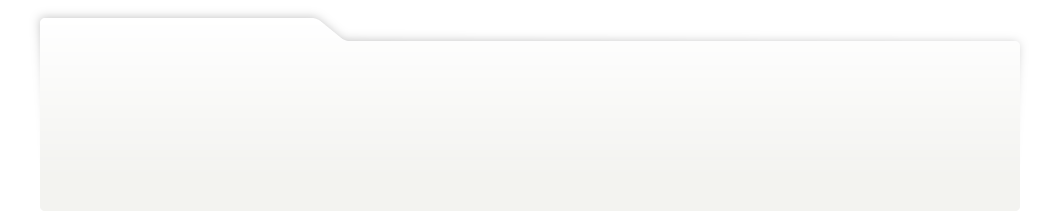
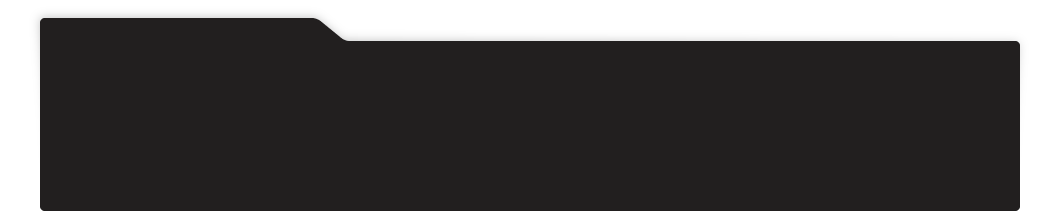
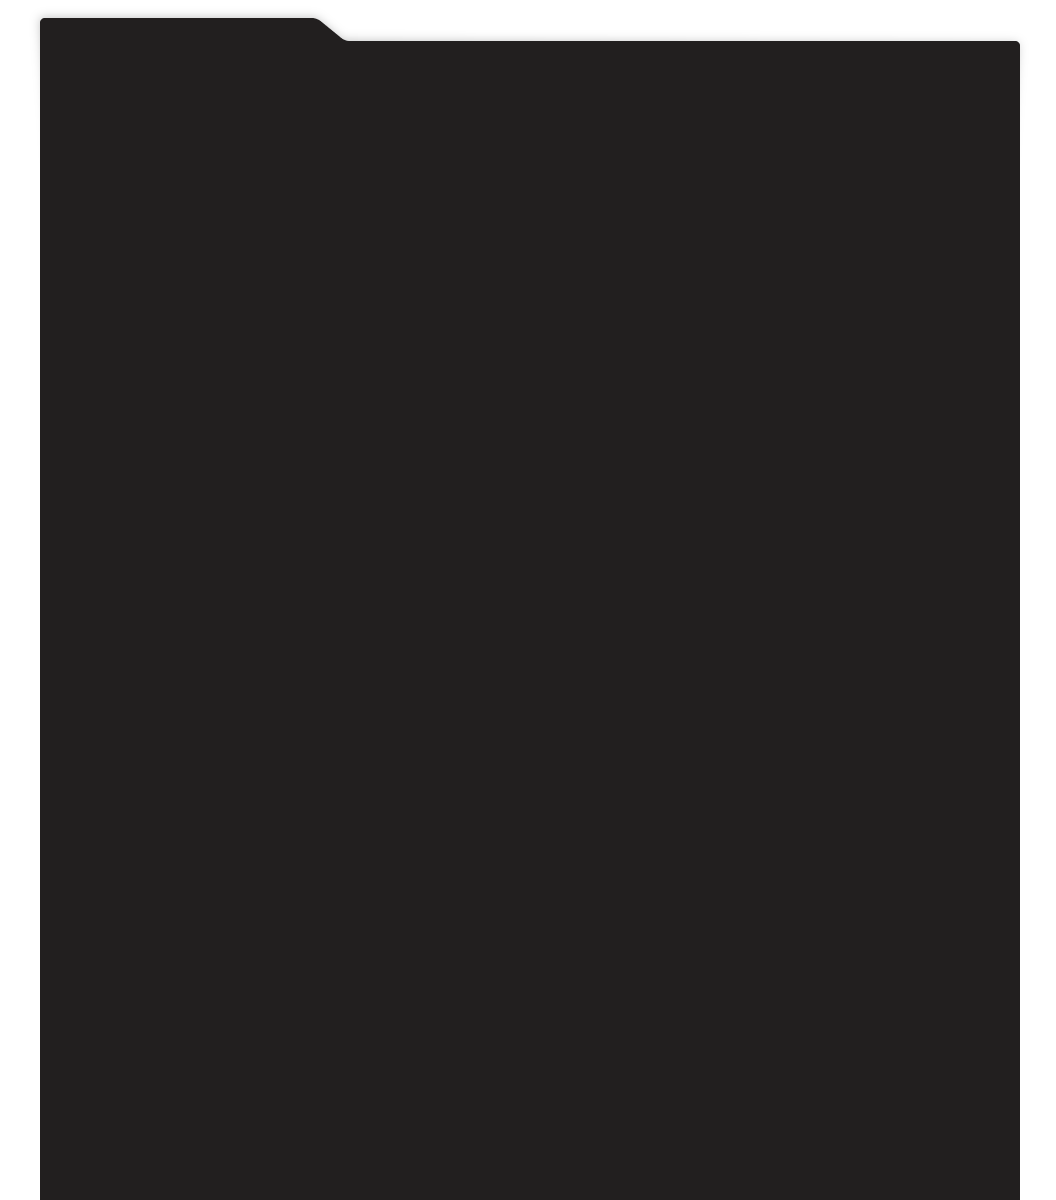
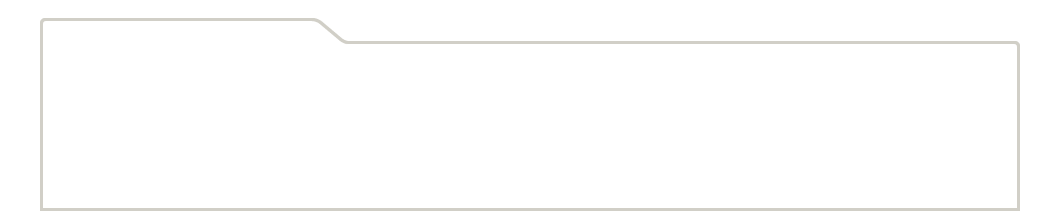
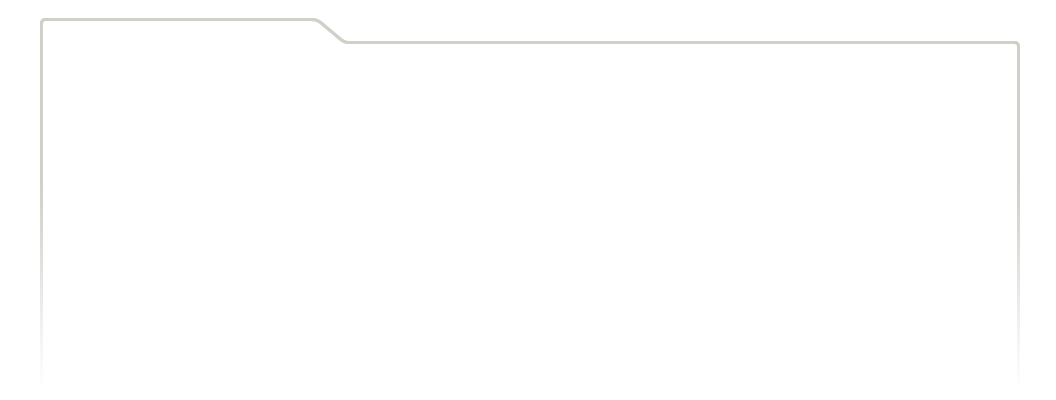
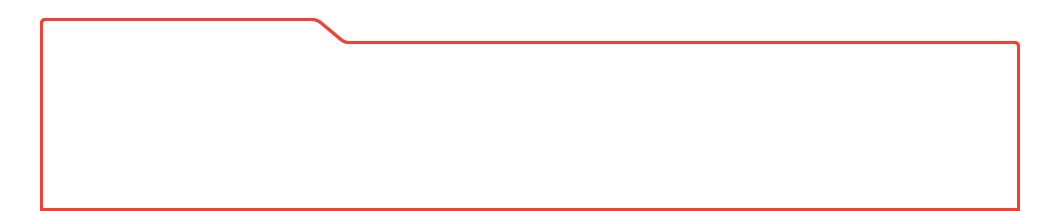
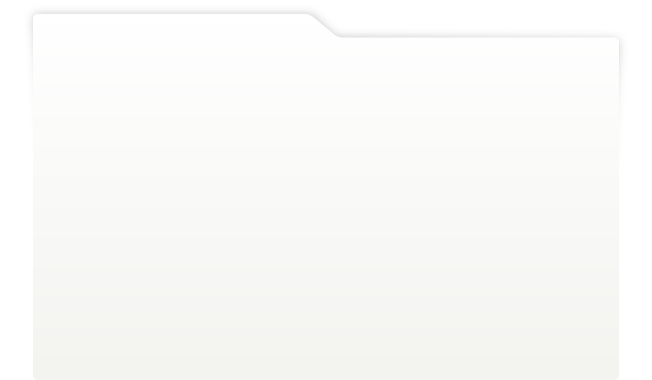
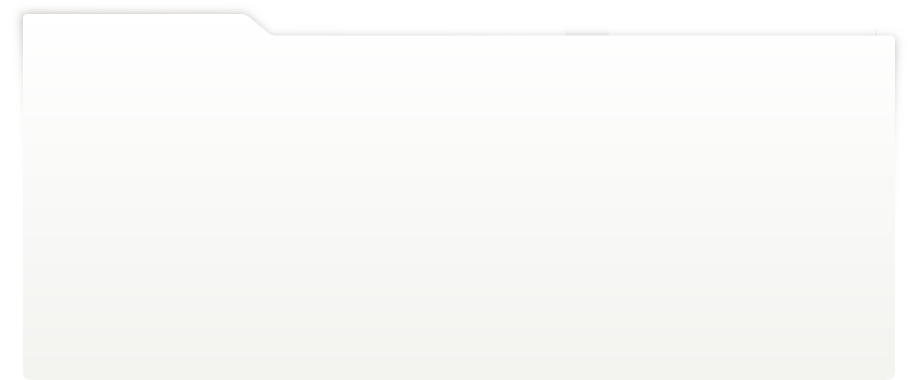
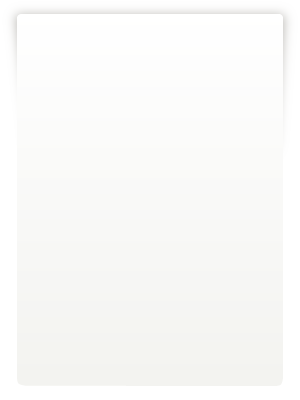
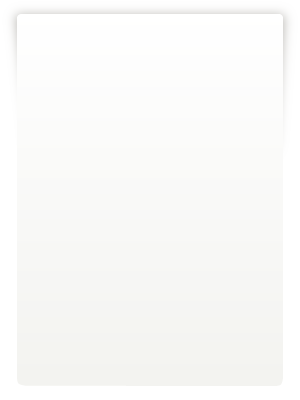
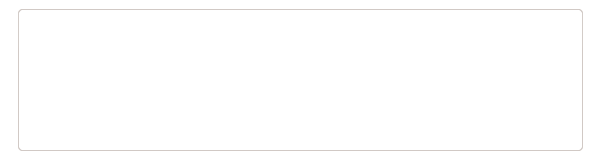
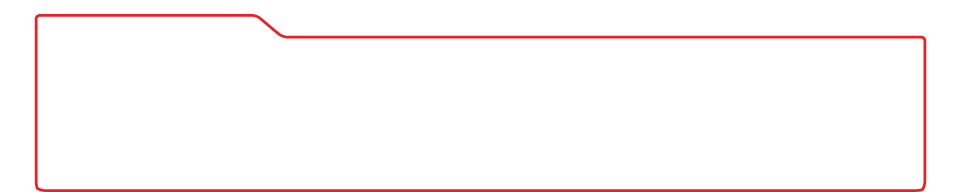
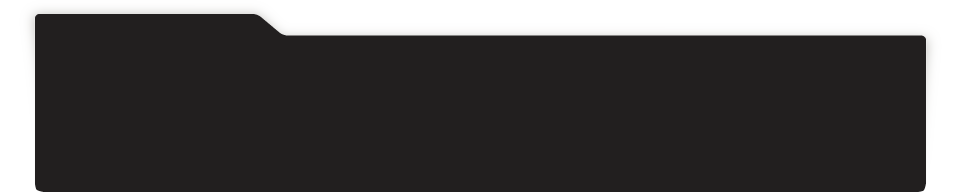
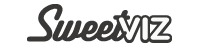
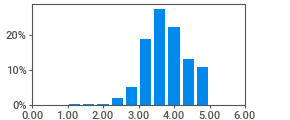
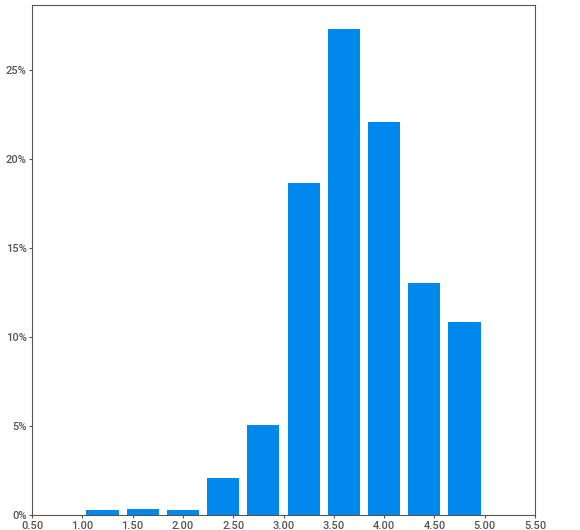
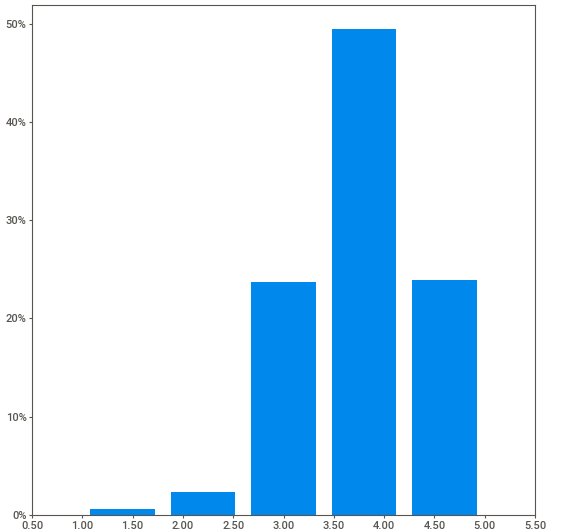
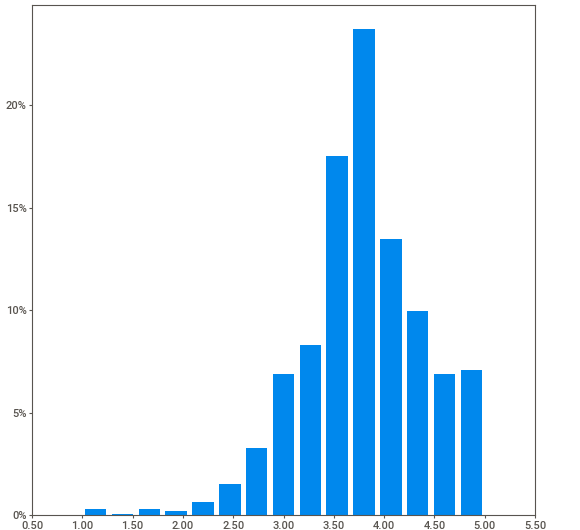
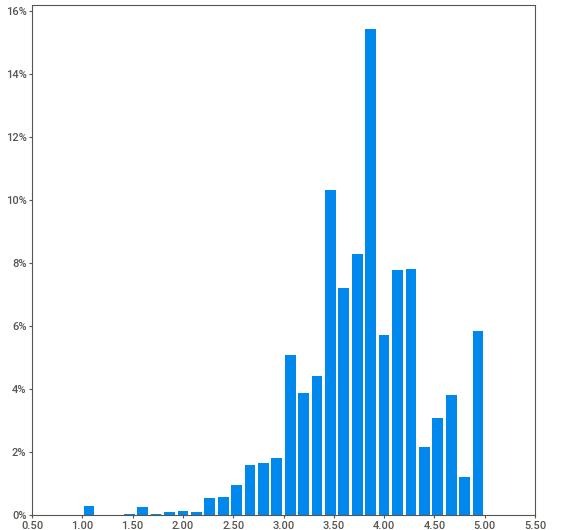
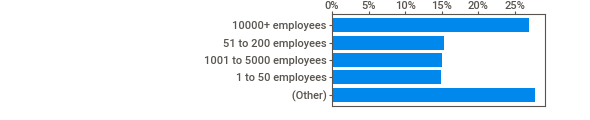
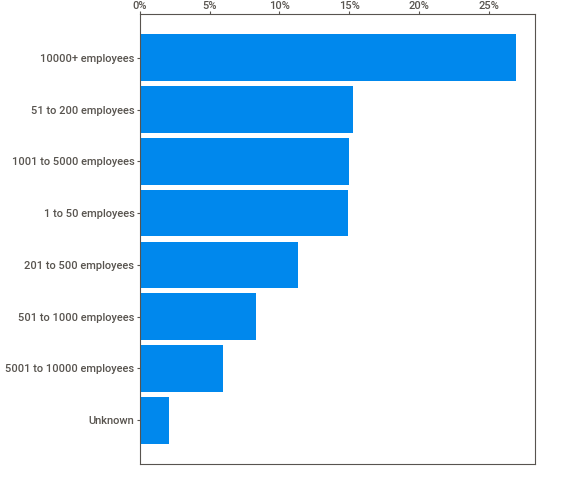
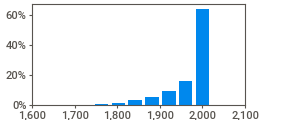
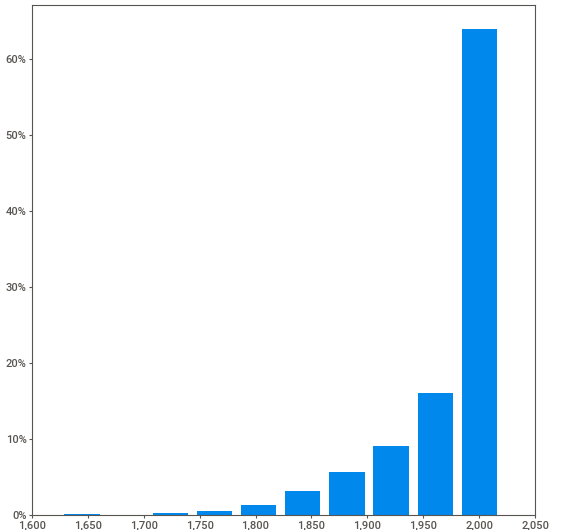
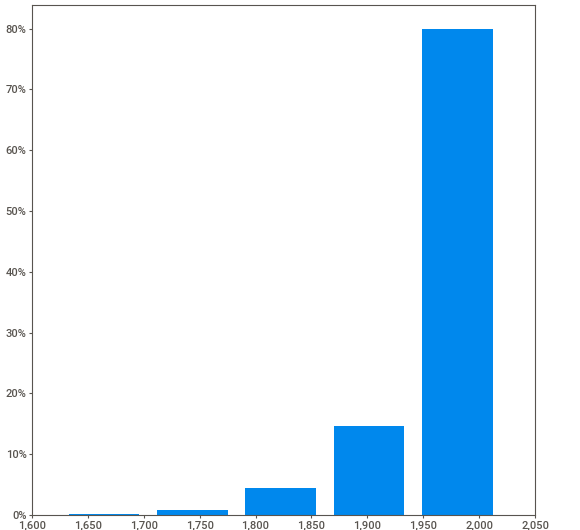
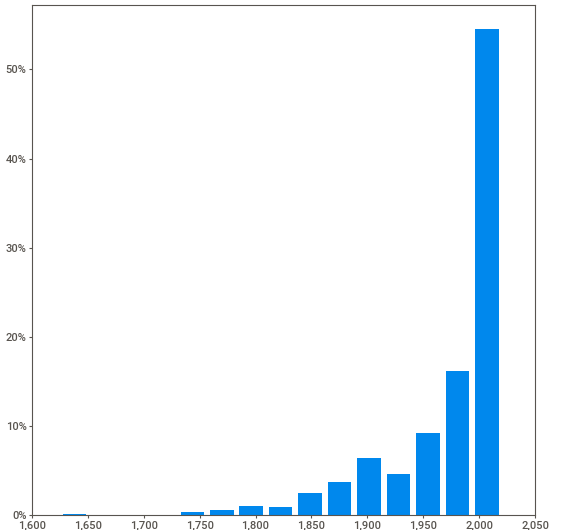
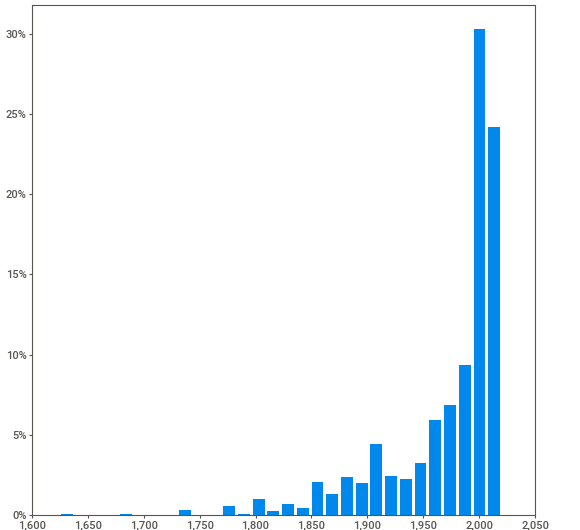
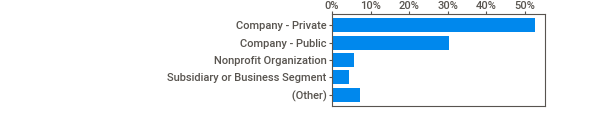
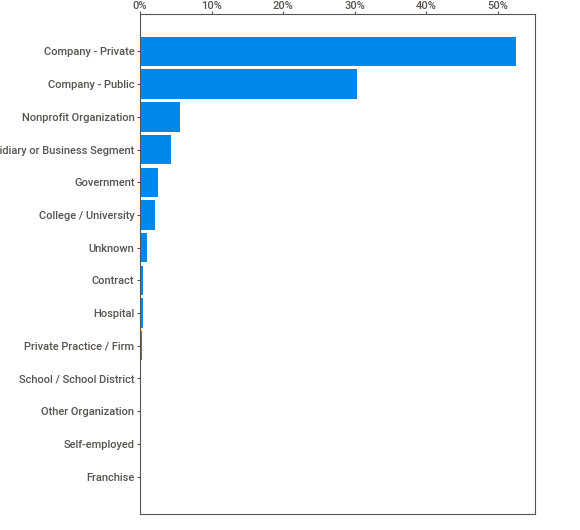
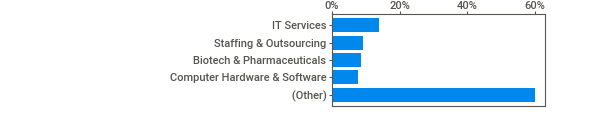
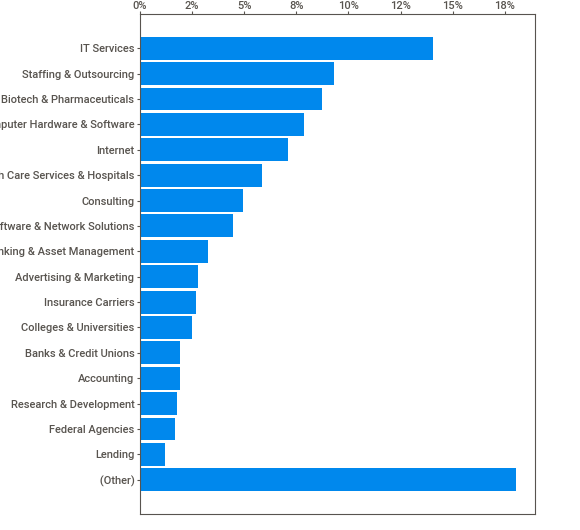
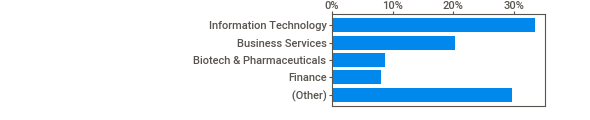
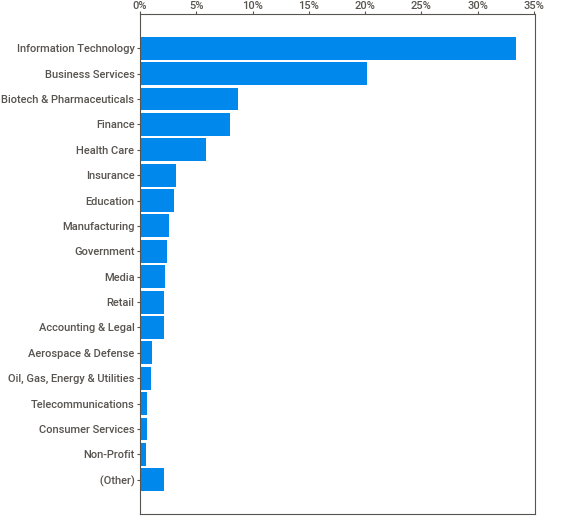
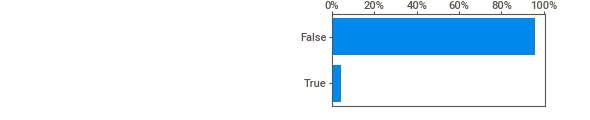
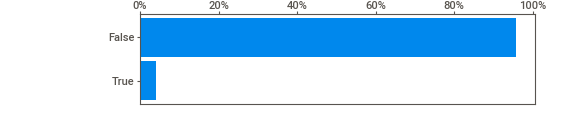
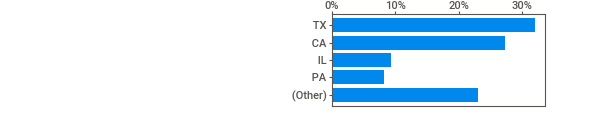
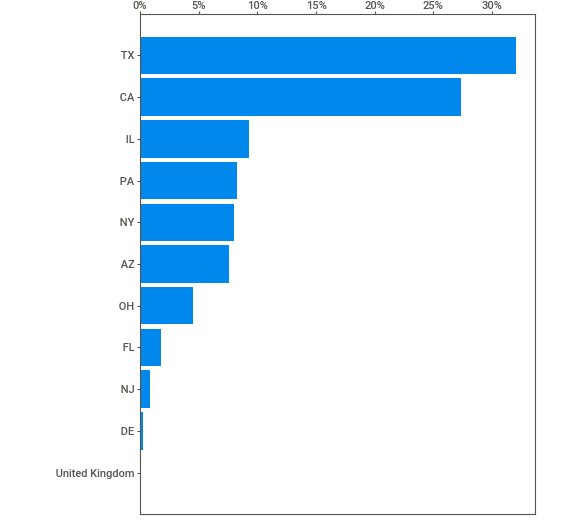
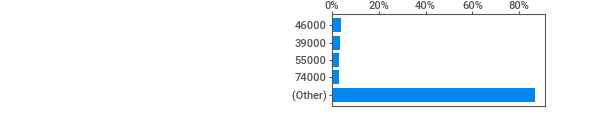
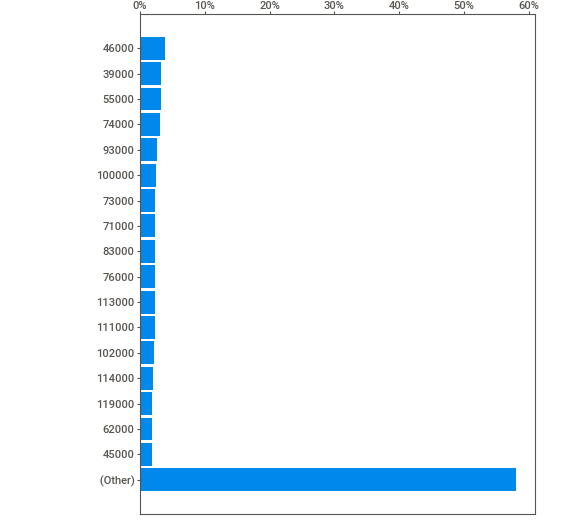
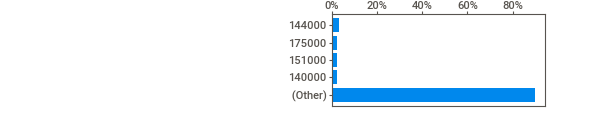
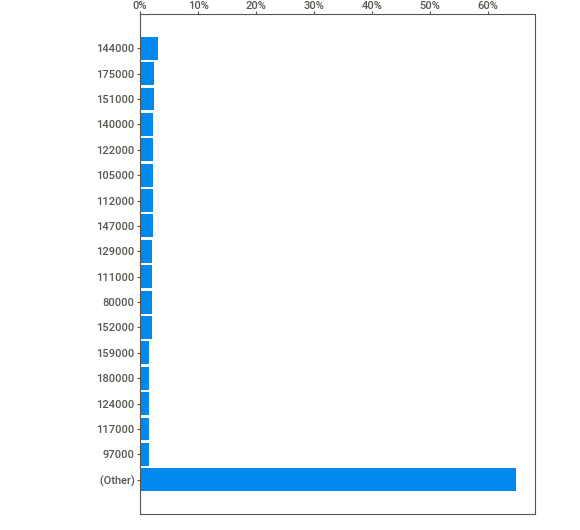
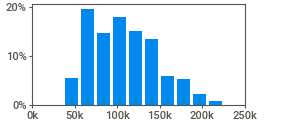
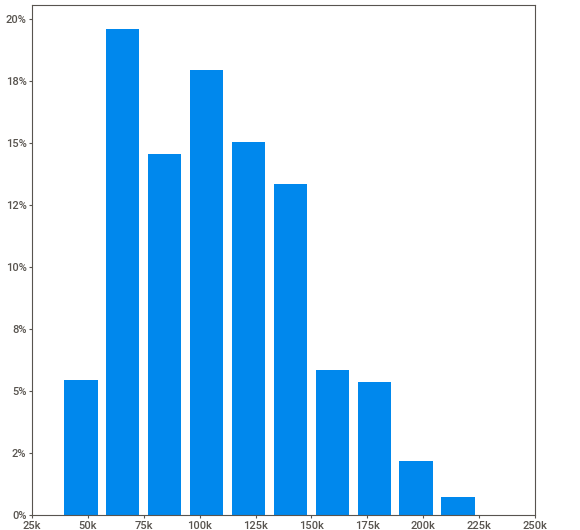
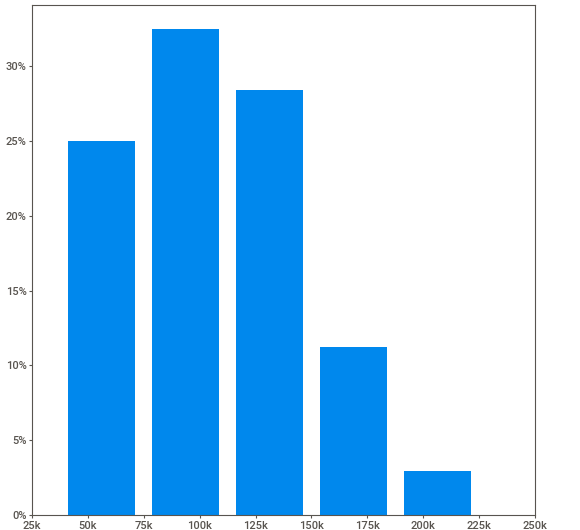
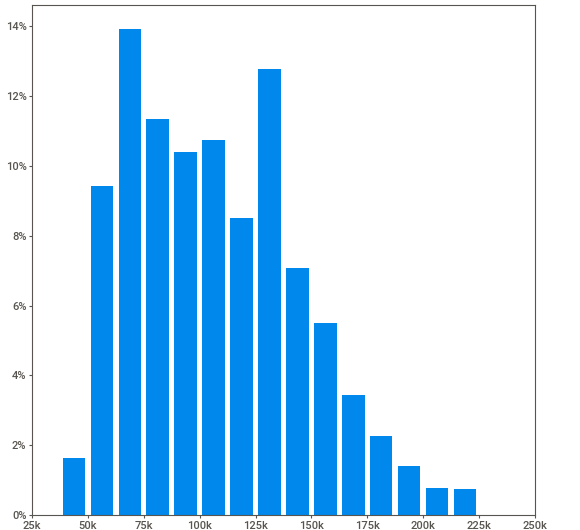
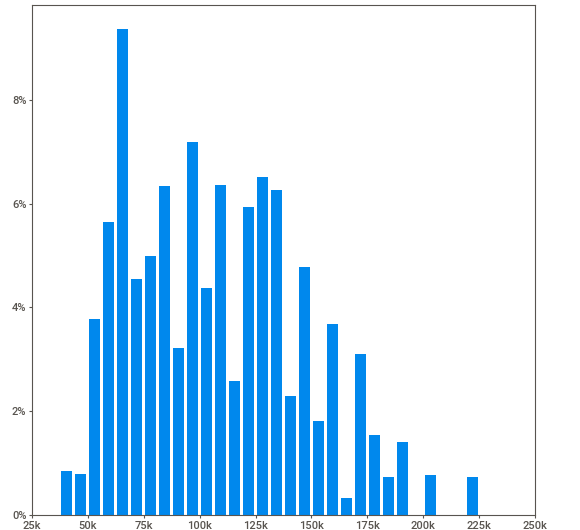
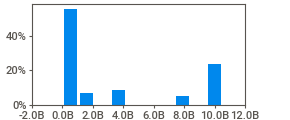
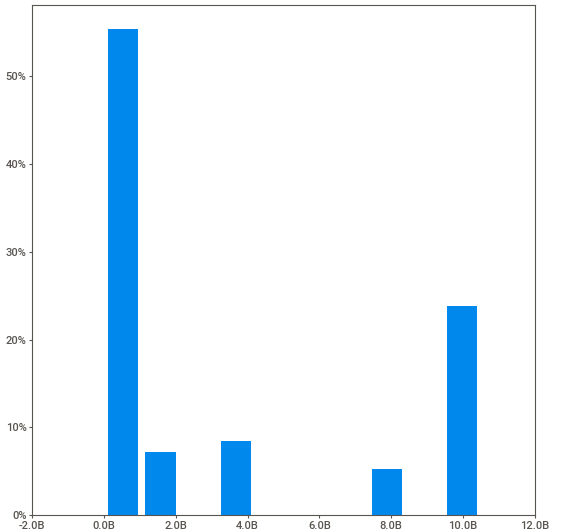
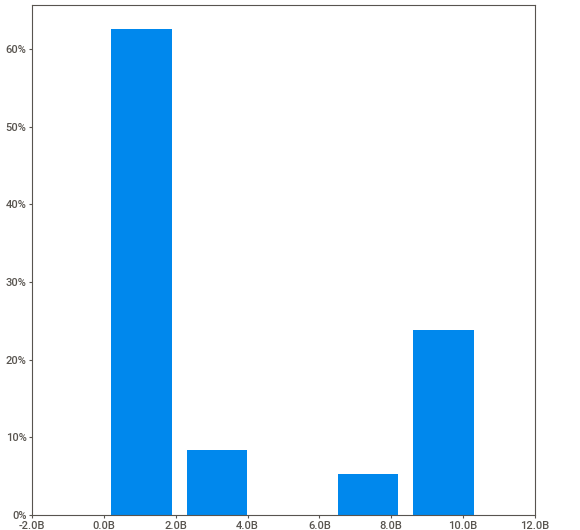
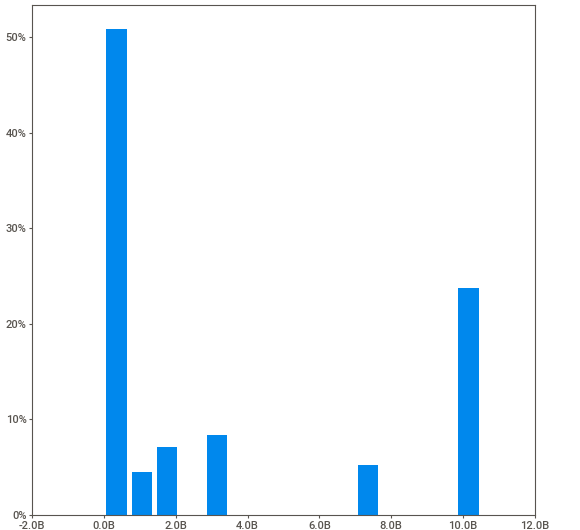
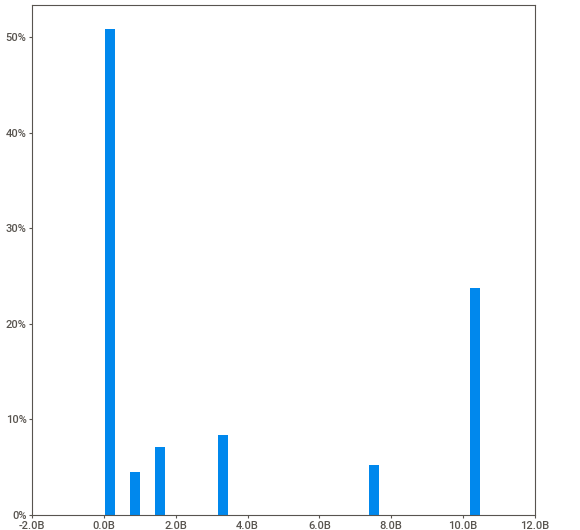
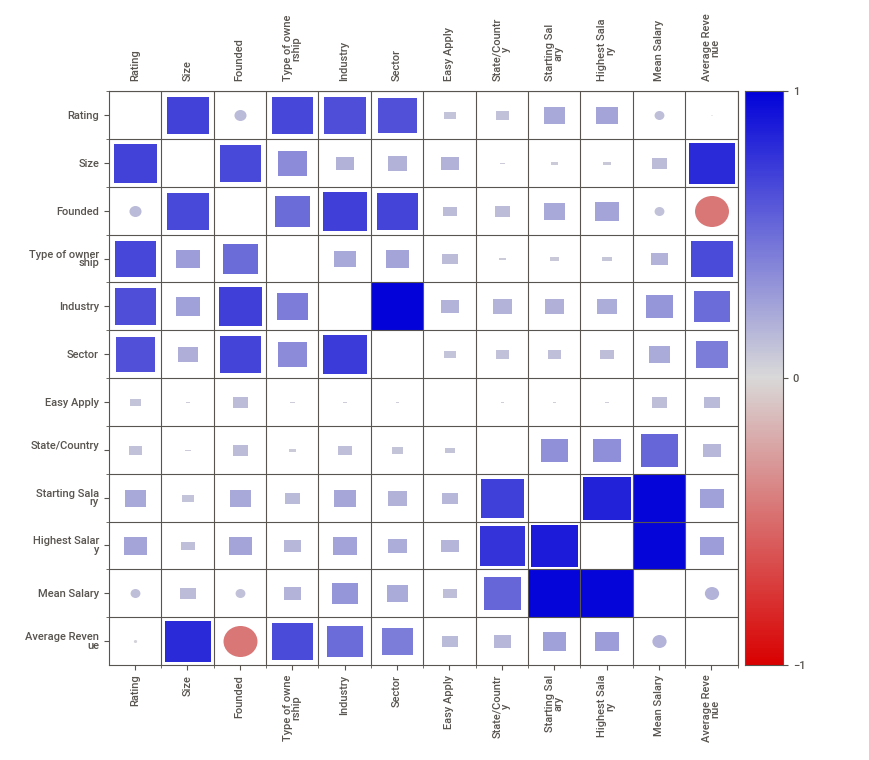
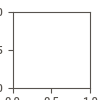

In [27]:
# Data Overview after data cleaning
my_report  = sweetviz.analyze([c_data, 'Dataset_Overview'])
my_report.show_notebook()

Data Visualization

1. Salary Visualization

--> Distribution of Salary

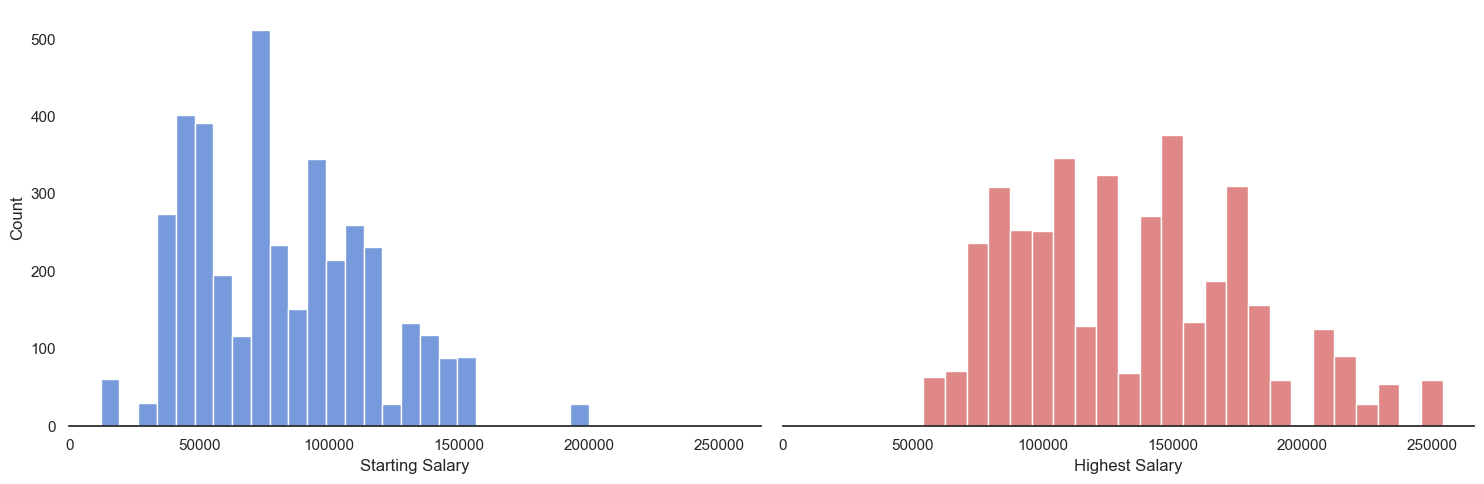

In [28]:
# Salary distribution of Data Science job roles
sns.set(style='white', palette='muted', color_codes=True)
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True, sharey=True)
sns.despine(left=True)
sns.histplot(c_data['Starting Salary'], color='b', ax=axes[0])
sns.histplot(c_data['Highest Salary'], color='r', ax=axes[1])
plt.tight_layout()

In [29]:
# Distribution of salary compared to the company's ratings
fig = px.scatter(c_data, x=c_data['Rating'], y=c_data['Mean Salary'])
fig.update_layout(title='Distribution of Mean salary and Company ratings')
fig.show()

--> Salary Comparison
    

        a.) Top 15 Data Science job roles with good average salary

In [30]:
# Top 15 Job roles in the dataset according to the Salary data
sal_df = c_data.groupby('Job Title')[['Starting Salary','Highest Salary']].mean().nlargest(15,['Starting Salary','Highest Salary']).round(2).head(15)
fig = go.Figure()
fig.add_trace(go.Bar(x=sal_df.index, y=sal_df['Starting Salary'], name='Starting Salary'))
fig.add_trace(go.Bar(x=sal_df.index, y=sal_df['Highest Salary'], name='Highest Salary'))
fig.update_layout(title='Top 15 Job roles in the dataset according to the Salary data', barmode='group')
fig.show()

        b.) Salary comparison of Data Science core job roles

In [31]:
# Dataframes for only core Data Science job roles
da_data = c_data[c_data['Job Title'].str.contains('Data Analyst', regex=True) == True].reset_index()
ds_data = c_data[c_data['Job Title'].str.contains('Data Scientist', regex=True) == True].reset_index()
de_data = c_data[c_data['Job Title'].str.contains('Data Engineer', regex=True) == True].reset_index()
ba_data = c_data[c_data['Job Title'].str.contains('Business Analyst', regex=True) == True].reset_index()
ml_data = c_data[c_data['Job Title'].str.contains('Machine Learning Engineer|Machine Learning|ML Engineer', regex=True) == True].reset_index()
# Mean value of salary from core Data Science job roles
da_mean = da_data[['Mean Salary']].nlargest(len(da_data['Mean Salary']),"Mean Salary").mean()
ds_mean = ds_data[['Mean Salary']].nlargest(len(ds_data['Mean Salary']),"Mean Salary").mean()
de_mean = de_data[['Mean Salary']].nlargest(len(de_data['Mean Salary']),"Mean Salary").mean()
ba_mean = ba_data[['Mean Salary']].nlargest(len(ba_data['Mean Salary']),"Mean Salary").mean()
ml_mean = ml_data[['Mean Salary']].nlargest(len(ml_data['Mean Salary']),"Mean Salary").mean()
# Dictionary of respective mean values
mean_df = {'Data Analyst': da_mean[0], 'Data Scientist': ds_mean[0], 'Data Engineer': de_mean[0], 'Business Analyst': ba_mean[0], 'ML Engineer': ml_mean[0]}

# Dictionary converted into dataframe
mean_df = pd.DataFrame.from_dict([mean_df])

Text(0, 0.5, 'Mean Salary')

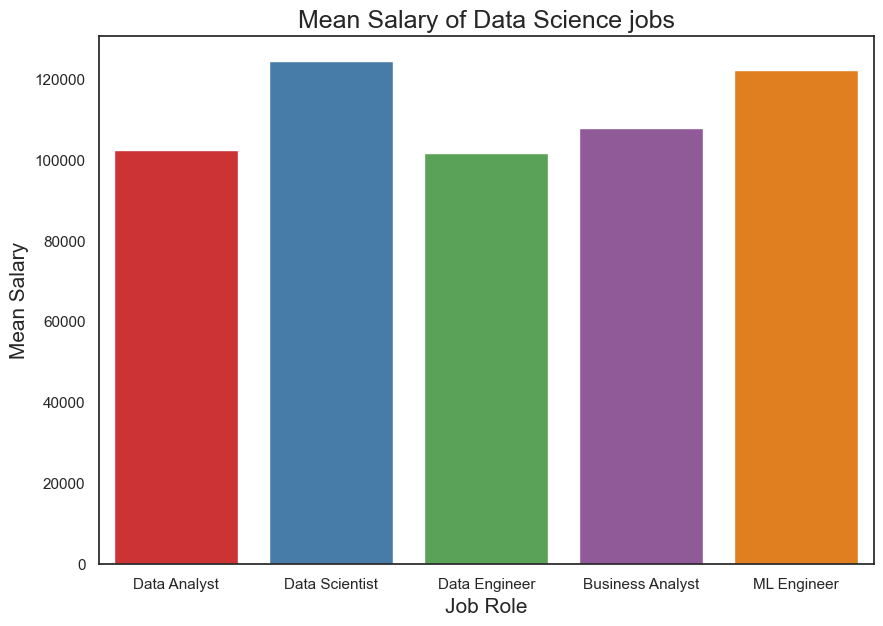

In [32]:
# Plot of mean salary of Data Science job roles
plt.figure(figsize=(10, 7))
chart = sns.barplot(    
    data=mean_df,    
    palette='Set1'
)
chart=chart.set_xticklabels(
    chart.get_xticklabels(),
    fontweight='light',
)
plt.title('Mean Salary of Data Science jobs', fontsize=18)
plt.xlabel('Job Role', fontsize=15)
plt.ylabel('Mean Salary', fontsize=15)

        c) Top 15 well paying Companies

In [33]:
# Top 15 well paying Companies in the dataset according to the Salary data
sal_df = c_data.groupby('Company Name')[['Starting Salary','Highest Salary']].mean().nlargest(15,['Starting Salary','Highest Salary']).round(2).head(15)
fig = go.Figure()
fig.add_trace(go.Bar(x=sal_df.index, y=sal_df['Starting Salary'], name='Starting Salary'))
fig.add_trace(go.Bar(x=sal_df.index, y=sal_df['Highest Salary'], name='Highest Salary'))
fig.update_layout(title='Top 15 well paying Companies', barmode='group')
fig.show()

        d) Top 15 well paid working Sectors

In [34]:
# Top 15 well paid working sectors in the dataset according to the Salary data
sal_df = c_data.groupby('Sector')[['Starting Salary','Highest Salary']].mean().nlargest(15,['Starting Salary','Highest Salary']).round(2).head(15)
fig = go.Figure()
fig.add_trace(go.Bar(x=sal_df.index, y=sal_df['Starting Salary'], name='Starting Salary'))
fig.add_trace(go.Bar(x=sal_df.index, y=sal_df['Highest Salary'], name='Highest Salary'))
fig.update_layout(title='Top 15 well paid sectors', barmode='relative')
fig.show()

        e) Top 15 well paid cities

In [35]:
# Top 15 well paid cities in the dataset according to the Salary data
sal_df = c_data.groupby('Location')[['Starting Salary','Highest Salary']].mean().nlargest(15,['Starting Salary','Highest Salary']).round(2).head(15)
fig = go.Figure()
fig.add_trace(go.Bar(x=sal_df.index, y=sal_df['Starting Salary'], name='Starting Salary'))
fig.add_trace(go.Bar(x=sal_df.index, y=sal_df['Highest Salary'], name='Highest Salary'))
fig.update_layout(title='Top 15 well paid cities', barmode='relative')
fig.show()

        f) Top 15 well paying Companies (currently hiring)

In [36]:
# Top 15 well paying Companies (currently hiring) in the dataset according to the Salary data
sal_df = c_data[c_data['Easy Apply']==True].groupby('Company Name')[['Starting Salary','Highest Salary']].mean().nlargest(15,['Starting Salary','Highest Salary']).round(2).head(15)
fig = go.Figure()
fig.add_trace(go.Bar(x=sal_df.index, y=sal_df['Starting Salary'], name='Starting Salary'))
fig.add_trace(go.Bar(x=sal_df.index, y=sal_df['Highest Salary'], name='Highest Salary'))
fig.update_layout(title='Top 15 well paying Companies (currently hiring)', barmode='group')
fig.show()

        g) Top 15 well paying Industries

In [37]:
# Top 15 well paying Industries in the dataset according to the Salary data
sal_df = c_data.groupby('Industry')[['Starting Salary','Highest Salary']].mean().nlargest(15,['Starting Salary','Highest Salary']).round(2).head(15)
fig = go.Figure()
fig.add_trace(go.Bar(x=sal_df.index, y=sal_df['Starting Salary'], name='Starting Salary'))
fig.add_trace(go.Bar(x=sal_df.index, y=sal_df['Highest Salary'], name='Highest Salary'))
fig.update_layout(title='Top 15 well paid Industries', barmode='relative')
fig.show()

2. Job Title Visualization  

        a) 15 Most popular job titles

Text(0.5, 1.0, '15 Most popular job titles')

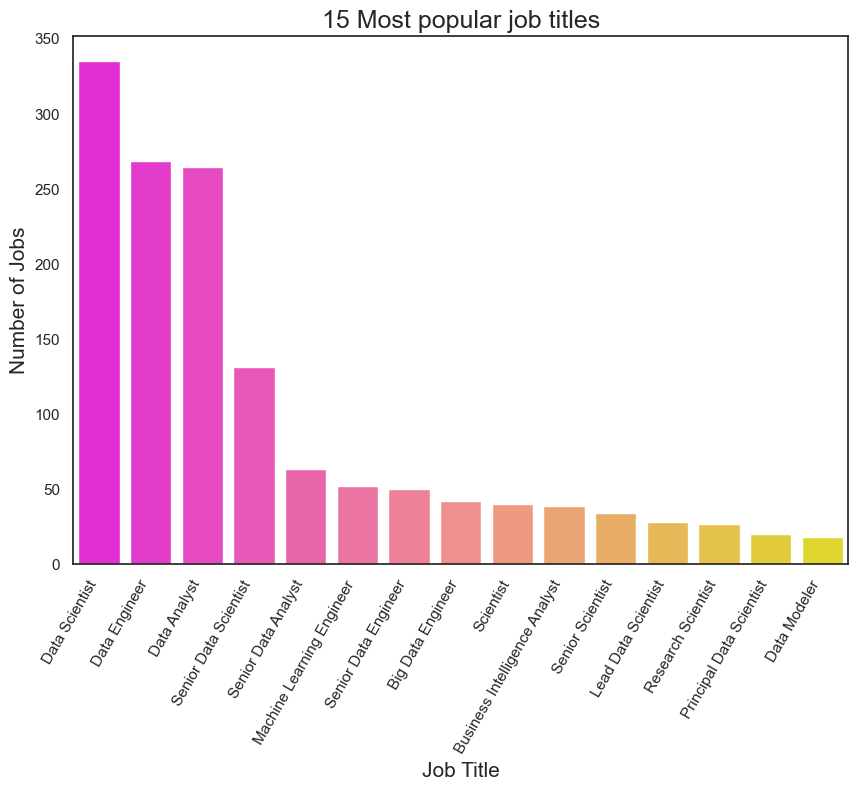

In [38]:
# Plot of 15 Most popular job titles
plt.figure(figsize=(10, 7))
title_df = c_data['Job Title'].value_counts()[0:15]
chart = sns.barplot(x=title_df.index, y=title_df, palette = 'spring')
chart = chart.set_xticklabels(
    chart.get_xticklabels(),    
    horizontalalignment='right',
    rotation=60,
)
plt.xlabel('Job Title',fontsize=15)
plt.ylabel('Number of Jobs',fontsize=15)
plt.title('15 Most popular job titles',fontsize=18)

        b) Most popular Data science core job roles

In [39]:
# Dictionary of respective counts
length_df = {'Data Analyst': len(da_data), 'Data Scientist': len(ds_data), 'Data Engineer': len(de_data), 'Business Analyst': len(ba_data), 'ML Engineer': len(ml_data)}

# Dictionary converted into dataframe
length_df = pd.DataFrame.from_dict([length_df])

Text(0, 0.5, 'Number of Jobs')

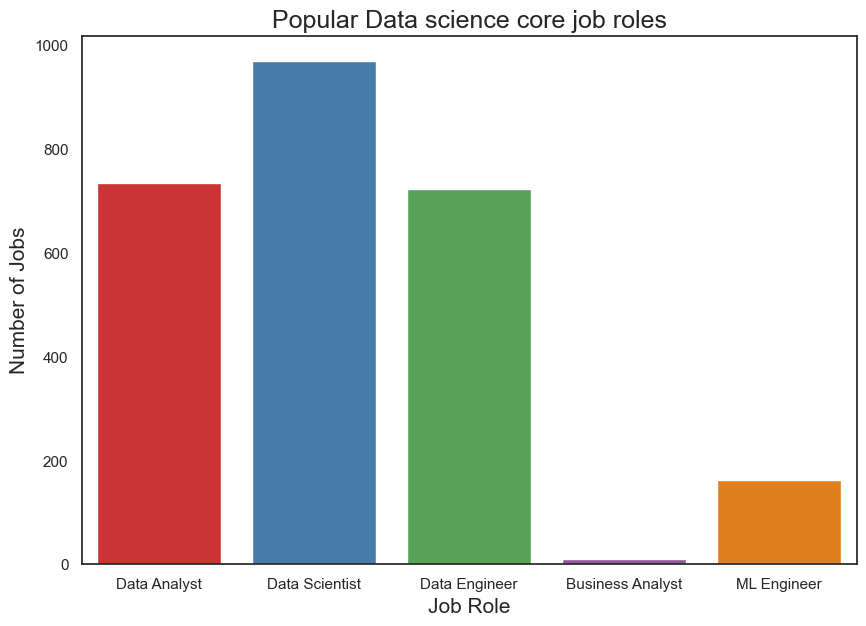

In [40]:
# Plot of popular Data science core job roles
plt.figure(figsize=(10, 7))
chart = sns.barplot(    
    data=length_df,    
    palette='Set1'
)
plt.title('Popular Data science core job roles', fontsize=18)
plt.xlabel('Job Role', fontsize=15)
plt.ylabel('Number of Jobs', fontsize=15)

        c) Word cloud of Job titles in the dataset

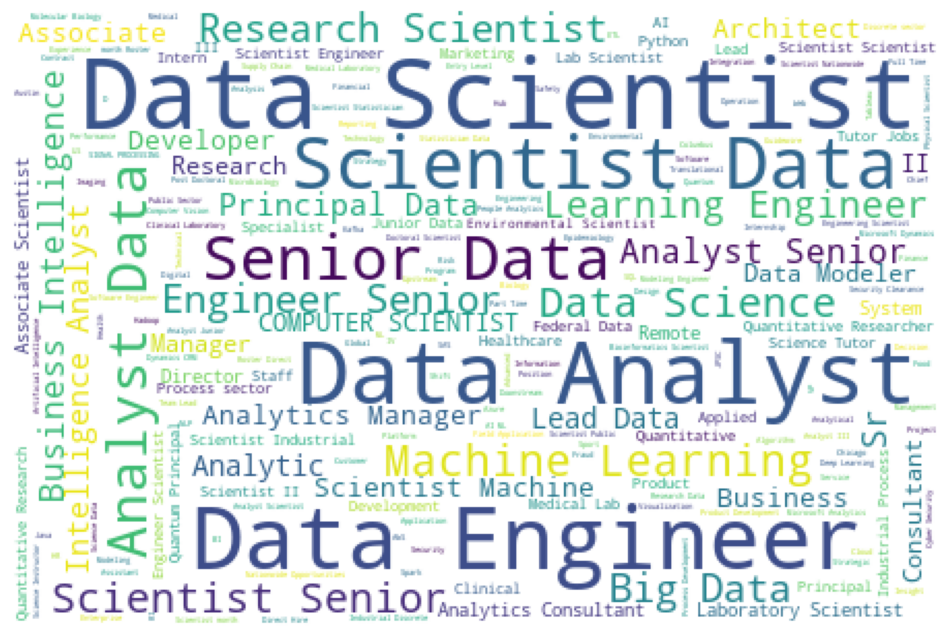

In [41]:
# Plot of word cloud of different Job titles in the dataset
plt.figure(figsize=(12, 12))
word_plot = wc.WordCloud(background_color='white', width=450, height= 300)
text = c_data['Job Title']
word_plot.generate(str(' '.join(text)))
plt.imshow(word_plot)
plt.axis("off")
plt.show()

3. Revenue Visualization

        a) Distribution of revenue according to company founding year

In [42]:
# Distribution of revenue according to company founding year
fig = px.scatter(c_data, x=c_data['Founded'], y=c_data['Average Revenue'])
fig.update_layout(title='Distribution of Average revenue by company founding year')
fig.show()

        b) Top 15 Highest Revenue sectors

In [43]:
# Plot of Top 15 Highest Revenue sectors
rev_df = c_data.groupby('Sector')[['Average Revenue']].mean().nlargest(15,['Average Revenue']).round(2).head(15)
fig = px.bar(rev_df, x=rev_df.index, y=rev_df['Average Revenue'], color='Average Revenue')
fig.update_layout(title='Top 15 Highest Revenue sectors', barmode='group')
fig.show()

        c) Top 15 Highest Revenue industries

In [44]:
# Plot of Top 15 Highest Revenue industries
rev_df = c_data.groupby('Industry')[['Average Revenue']].mean().nlargest(15,['Average Revenue']).round(2).head(15)
fig = px.bar(rev_df, x=rev_df.index, y=rev_df['Average Revenue'], color='Average Revenue')
fig.update_layout(title='Top 15 Highest Revenue industries', barmode='relative')
fig.show()

        d) Revenue distribution by type of ownership

In [45]:
rev_df = c_data.groupby('Type of ownership')[['Average Revenue']].mean()
fig = px.pie(rev_df, values=rev_df['Average Revenue'], names=rev_df.index, color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(title = 'Revenue distribution by type of ownership')
fig.show()

4. Company wise Visualization

        a) Top 15 companies with data science jobs

Text(0.5, 1.0, 'Top 15 companies with data science jobs')

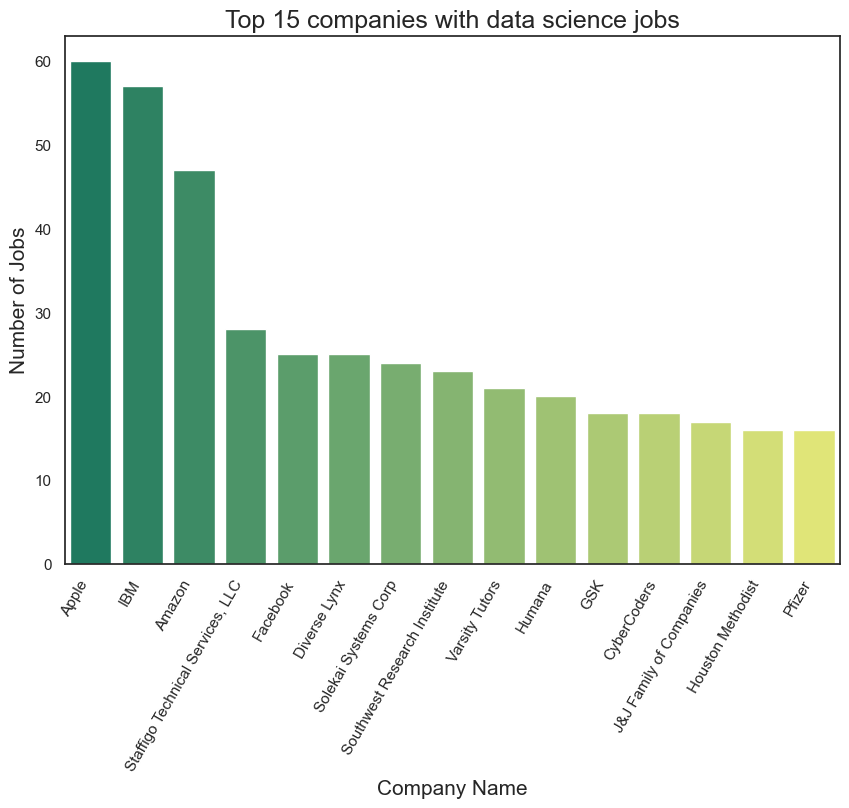

In [46]:
plt.figure(figsize=(10, 7))
cmp_df = c_data['Company Name'].value_counts().nlargest(15)
chart = sns.barplot(x=cmp_df.index, y=cmp_df.values, palette = 'summer')
chart = chart.set_xticklabels(
    chart.get_xticklabels(),
    horizontalalignment='right',
    rotation=60,
)
plt.xlabel('Company Name',fontsize=15)
plt.ylabel('Number of Jobs',fontsize=15)
plt.title('Top 15 companies with data science jobs',fontsize=18)

        b) Top competitor companies of Top 10 Companies

In [49]:
cmp_df = c_data['Company Name'].value_counts().nlargest(10)
cmp_name = str()
for i in range(len(cmp_df.index.values)):
    cmp_name = cmp_name + '|' + cmp_df.index.values[i]

cmp_name = cmp_name.lstrip('|')
top_comp = c_data[c_data['Company Name'].str.contains(cmp_name, regex=True)].reset_index()

In [50]:
cmp_list = []
for i in range(len(top_comp['Competitors'])):    
    for j in range(len(str(top_comp['Competitors'][i]).split(','))):        
        if(str(top_comp['Competitors'][i]) != 'nan'):
            cmp_list.append(str(top_comp['Competitors'][i]).split(',')[j].strip(' '))

In [51]:
cmp_list = pd.DataFrame(cmp_list)
cmp_list = cmp_list.rename(columns={0 : 'Competitor'})

Text(0.5, 1.0, 'Top competitor companies of Top 10 Companies')

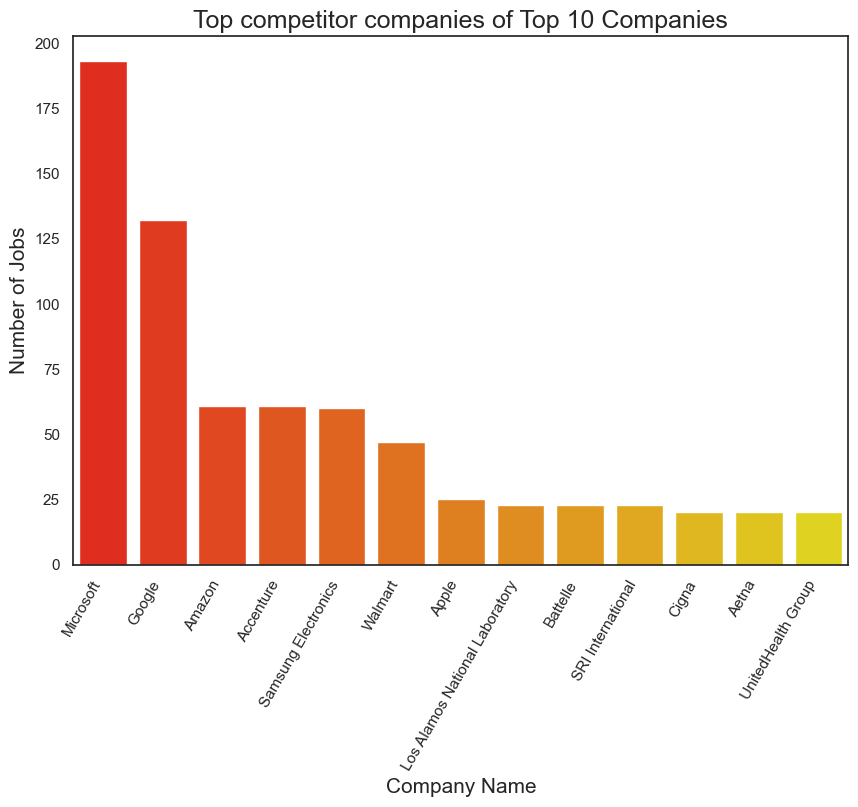

In [53]:
plt.figure(figsize=(10, 7))
c_df = cmp_list['Competitor'].value_counts()
chart = sns.barplot(x=c_df.index, y=c_df.values, palette = 'autumn')
chart = chart.set_xticklabels(
    chart.get_xticklabels(),
    horizontalalignment='right',
    rotation=60,
)
plt.xlabel('Company Name',fontsize=15)
plt.ylabel('Number of Jobs',fontsize=15)
plt.title('Top competitor companies of Top 10 Companies',fontsize=18)

        c) Word cloud of Top competitors

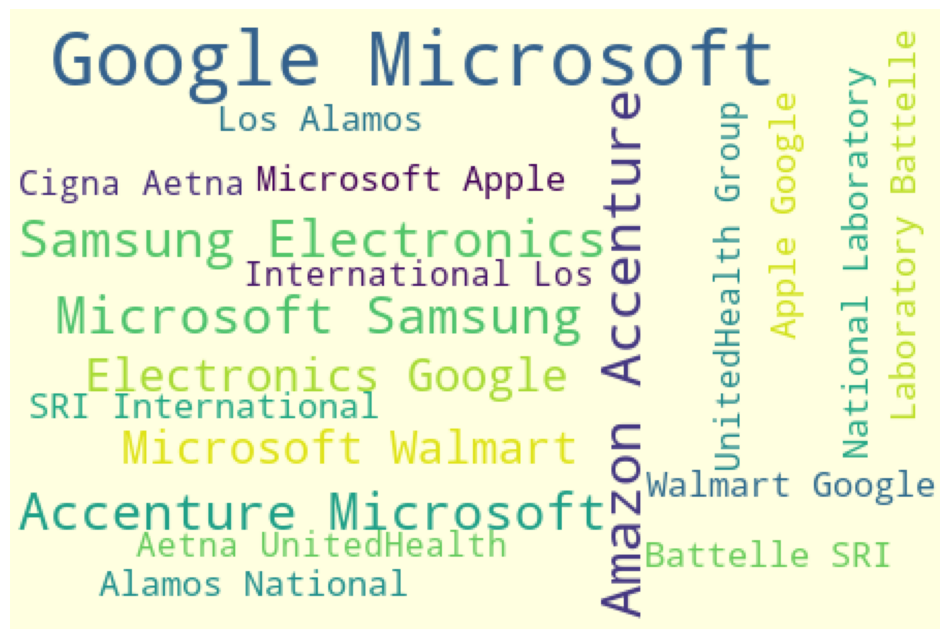

In [54]:
plt.figure(figsize=(12, 12))
word_plot = wc.WordCloud(background_color='lightyellow', width=450, height= 300)
text = cmp_list['Competitor']
word_plot.generate(str(' '.join(text)))
plt.imshow(word_plot)
plt.axis("off")
plt.show()

        d) Employee numbers in Top 15 Companies

Text(0.5, 1.0, 'Employee numbers in Top 15 Companies')

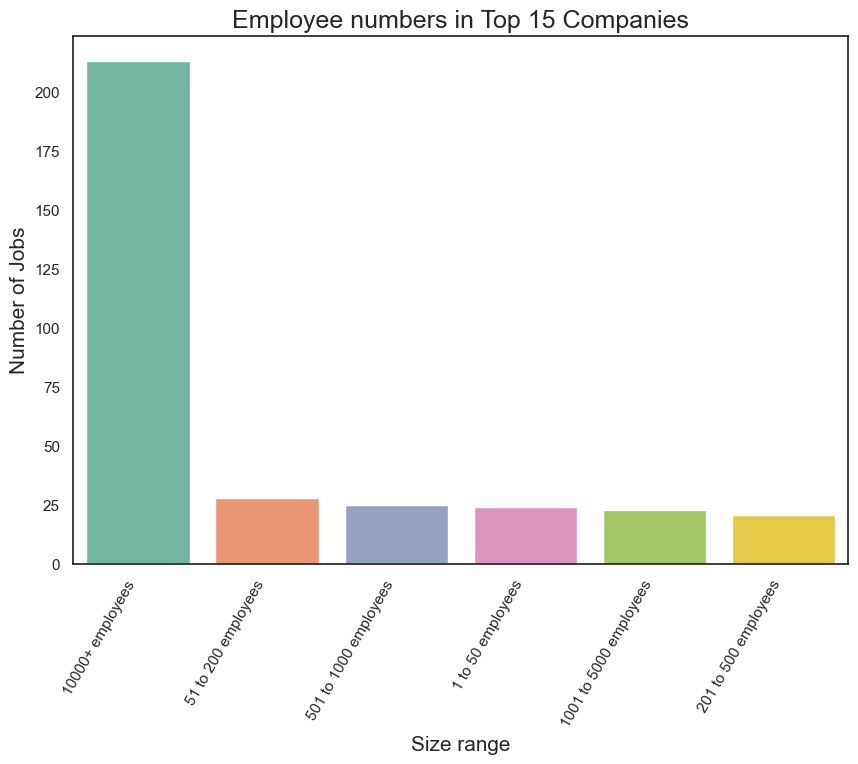

In [55]:
plt.figure(figsize=(10, 7))
size_df = top_comp['Size'].value_counts()
chart = sns.barplot(x=size_df.index, y=size_df.values, palette='Set2')
chart = chart.set_xticklabels(
    chart.get_xticklabels(),
    horizontalalignment='right',
    rotation=60,
)
plt.xlabel('Size range',fontsize=15)
plt.ylabel('Number of Jobs',fontsize=15)
plt.title('Employee numbers in Top 15 Companies',fontsize=18)

        e) Revenue distribution of Top 15 companies

In [56]:
top_df = top_comp.groupby('Company Name')[['Average Revenue']].mean()
fig = px.pie(top_df, values=top_df['Average Revenue'], names=top_df.index)
fig.update_layout(title = 'Revenue distribution of Top 15 companies')
fig.show()

        f) Word cloud of Top 15 company's headquarters

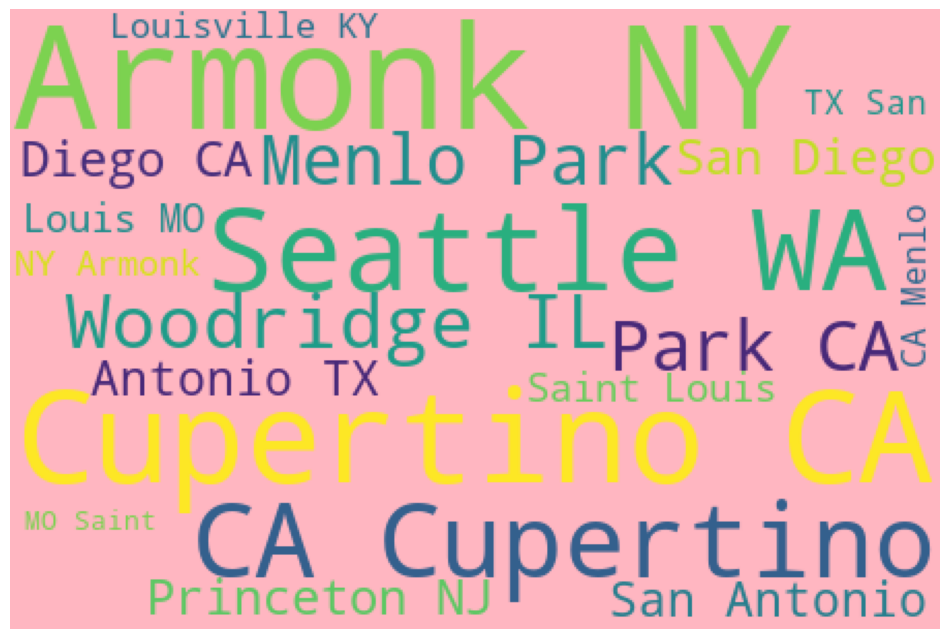

In [57]:
plt.figure(figsize=(12, 12))
word_plot = wc.WordCloud(background_color = 'lightpink', width=450, height= 300)
text = top_comp['Headquarters']
word_plot.generate(str(' '.join(text)))
plt.imshow(word_plot)
plt.axis("off")
plt.show()

In [58]:
c_data.head()

Job Title                                    Job Description  \
0  Senior Data Scientist  ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...   
1         Data Scientist  At Noom, we use scientifically proven methods ...   
2   Data Science Manager  Decode_M\n\nhttps://www.decode-m.com/\n\nData ...   
3           Data Analyst  Sapphire Digital seeks a dynamic and driven mi...   
4               Director  Director, Data Science - (200537)\nDescription...   

   Rating                Company Name   Location      Headquarters  \
0     3.5                      Hopper   New York  Montreal, Canada   
1     4.5                     Noom US   New York      New York, NY   
2     NaN                    Decode_M   New York      New York, NY   
3     3.4            Sapphire Digital  Lyndhurst     Lyndhurst, NJ   
4     3.4  United Entertainment Group   New York      New York, NY   

                     Size  Founded  Type of ownership  \
0   501 to 1000 employees   2007.0  Company - Private   
1  1001 to 5000 employees   2008.0  Company - Private   
2       1 to 50 employees      NaN            Unknown   
3    201 to 500 employees   2019.0  Company - Private   
4     51 to 200 employees   2007.0  Company - Private   

                    Industry                  Sector  \
0            Travel Agencies        Travel & Tourism   
1  Health, Beauty, & Fitness       Consumer Services   
2                        NaN                     NaN   
3                   Internet  Information Technology   
4    Advertising & Marketing       Business Services   

                Competitors  Easy Apply Starting Salary Highest Salary  \
0                       NaN       False          111000         181000   
1                       NaN       False          111000         181000   
2                       NaN        True          111000         181000   
3      Zocdoc, Healthgrades       False          111000         181000   
4  BBDO, Grey Group, Droga5       False          111000         181000   

   Mean Salary State/Country  Average Revenue  
0     146000.0            NY              NaN  
1     146000.0            NY              NaN  
2     146000.0            NY              NaN  
3     146000.0            NJ              NaN  
4     146000.0            NY              NaN

5. Location Visualization

        a) Top 20 Locations where Data science jobs are available

Text(0.5, 1.0, 'Top 20 Locations for Data science jobs')

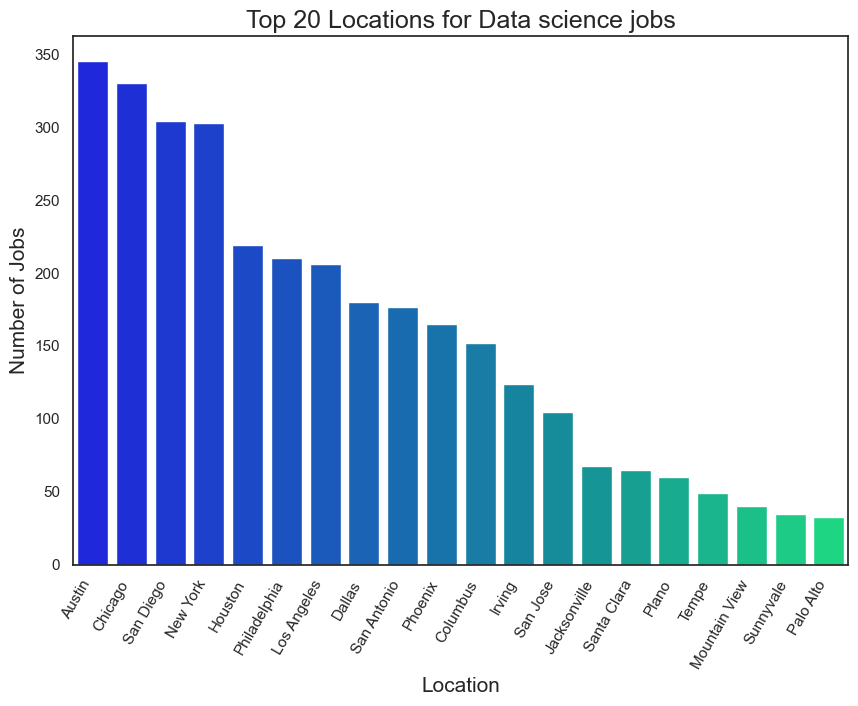

In [58]:
plt.figure(figsize=(10, 7))
loc_df = c_data['Location'].value_counts().nlargest(20)
chart = sns.barplot(x=loc_df.index, y=loc_df.values, palette = 'winter')
chart = chart.set_xticklabels(
    chart.get_xticklabels(),
    horizontalalignment='right',
    rotation=60,
)
plt.xlabel('Location',fontsize=15)
plt.ylabel('Number of Jobs',fontsize=15)
plt.title('Top 20 Locations for Data science jobs',fontsize=18)

        b) States in USA having Data Science jobs

In [59]:
loc_data = c_data[c_data['State/Country'].str.contains('United Kingdom') == False]
fig = px.choropleth(
    locationmode='USA-states',
    locations=loc_data['State/Country'].str.strip().values,        
    labels=loc_data['State/Country'].str.strip().values,
    color=loc_data['State/Country'].str.strip().values,    
    scope='usa',    
)
fig.show()

        c) Heatmap of States in USA having Data Science jobs

In [61]:
fig = go.Figure(data=go.Choropleth(
    locations=loc_data['State/Country'].value_counts().index.str.strip(),
    z = loc_data['State/Country'].value_counts().values,
    locationmode = 'USA-states',
    colorscale = 'Reds',
    colorbar_title = "No. of Jobs",
))
fig.update_layout(
    title_text = 'Heatmap of USA States with No. of Data Science jobs',
    geo_scope = 'usa',
)
fig.show()

6. Data science requirements visualization

        a) Data science programming languages requirements

In [62]:
plang = ['Python', 'R', 'Java', 'C++', 'Linux', 'Javascript']
lang_freq = dict()

for lang in plang:
    count = 0
    for desc in c_data['Job Description']:
        if lang in desc:
            count = count + 1
        lang_freq[lang] = count

plang_df = pd.DataFrame.from_dict(lang_freq.items())
plang_df.columns = ['Language Name', 'Count']

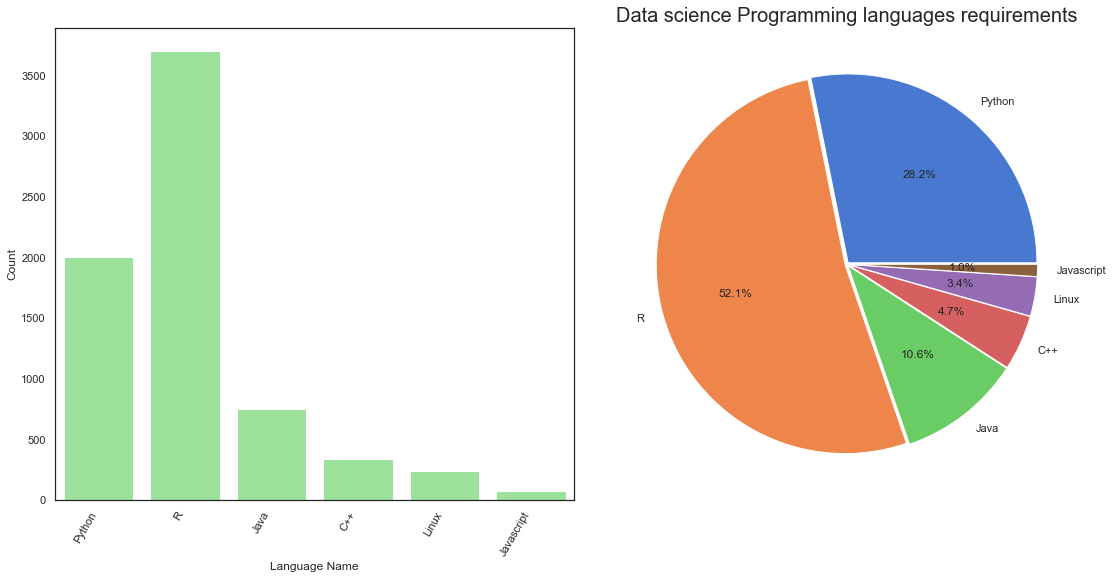

In [63]:
sns.set(style='white', palette='muted', color_codes=True)
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
chart = sns.barplot(x=plang_df['Language Name'], y=plang_df['Count'], color='lightgreen', ax=axes[0])
explode = [0.01 for x in range(len(plang_df))]
axes[1].pie(plang_df['Count'], explode = explode, labels=plang_df['Language Name'], autopct='%1.1f%%', startangle=0)
chart = chart.set_xticklabels(
    chart.get_xticklabels(),
    horizontalalignment='right',
    rotation=60,
)
plt.title('Data science Programming languages requirements',fontsize=20)
plt.tight_layout()

        b) Data science qualification requirements

In [64]:
edu = ['PhD', 'MD', 'Pharm.D', 'Doctorate', 'Postdoc', 'Masters', 'MSc', 'Bachelors', 'BSc']
edu_freq = dict()
for ed in edu:
    count = 0
    for desc in c_data['Job Description']:
        if ed in desc:
            count = count + 1
        edu_freq[ed] = count

edu_df = pd.DataFrame.from_dict(edu_freq.items())
edu_df.columns = ['Qualification Name', 'Count']

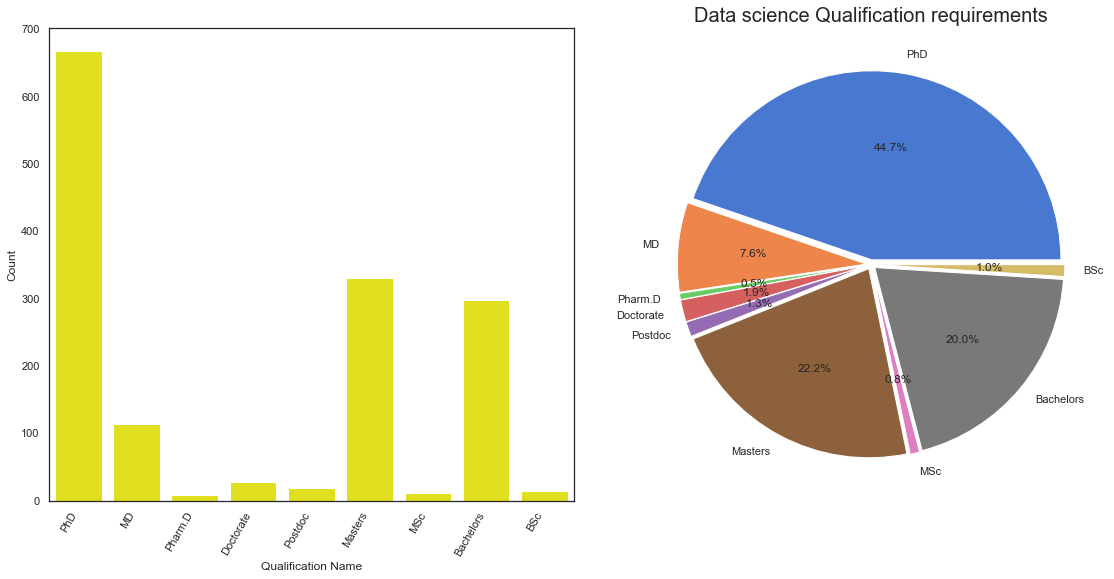

In [65]:
sns.set(style='white', palette='muted', color_codes=True)
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
chart = sns.barplot(x=edu_df['Qualification Name'], y=edu_df['Count'], color='yellow', ax=axes[0])
explode = [0.025 for x in range(len(edu_df))]
axes[1].pie(edu_df['Count'], explode = explode, labels=edu_df['Qualification Name'], autopct='%1.1f%%', startangle=0)
chart = chart.set_xticklabels(
    chart.get_xticklabels(),
    horizontalalignment='right',
    rotation=60,
)
plt.title('Data science Qualification requirements',fontsize=20)
plt.tight_layout()

        c) Data science Subject requirements

In [66]:
sub = ['Mathematics', 'Computer Science', 'Statistics', 'Biology', 'Chemistry', 'Biochemistry']
sub_freq = dict()

for sb in sub:
    count = 0
    for desc in c_data['Job Description']:
        if sb in desc:
            count = count + 1
        sub_freq[sb] = count

sub_df = pd.DataFrame.from_dict(sub_freq.items())
sub_df.columns = ['Subject Name', 'Count']

In [73]:
sub_freq

{'Mathematics': 524,
 'Computer Science': 1095,
 'Statistics': 733,
 'Biology': 133,
 'Chemistry': 95,
 'Biochemistry': 53}

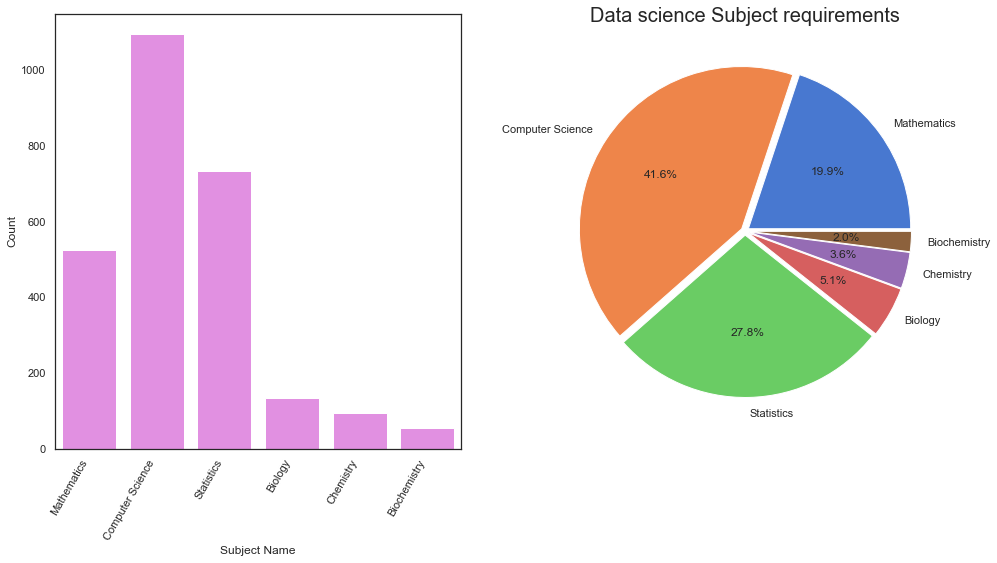

In [81]:
sns.set(style='white', palette='muted', color_codes=True)
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
chart = sns.barplot(x=sub_df['Subject Name'], y=sub_df['Count'], color='violet', ax=axes[0])
explode = [0.025 for x in range(len(sub_df))]
axes[1].pie(sub_df['Count'], explode = explode, labels=sub_df['Subject Name'], autopct='%1.1f%%', startangle=0)
chart = chart.set_xticklabels(
    chart.get_xticklabels(),
    horizontalalignment='right',
    rotation=60,
)
plt.title('Data science Subject requirements',fontsize=20)
plt.show()

        d) Data science tools requirements

In [68]:
tools = ['SQL', 'NoSQL', 'Tableau', 'Excel', 'Hadoop', 'Spark', 'SAS', 'Stata', 'Hive', 'Scala', 'AWS', 'GCP', 'Azure', 'Google Cloud']
tools_freq = dict()

for tool in tools:
    count = 0
    for desc in c_data['Job Description']:
        if tool in desc:
            count = count + 1
        tools_freq[tool] = count

tools_df = pd.DataFrame.from_dict(tools_freq.items())
tools_df.columns = ['Tool Name', 'Count']

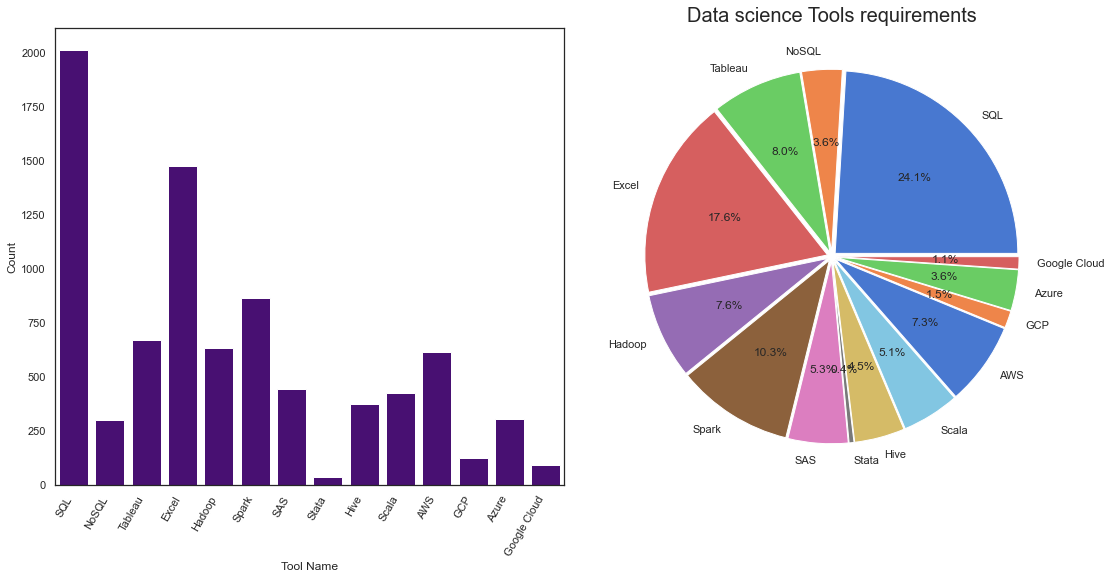

In [69]:
sns.set(style='white', palette='muted', color_codes=True)
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
chart = sns.barplot(x=tools_df['Tool Name'], y=tools_df['Count'], color='indigo', ax=axes[0])
explode = [0.025 for x in range(len(tools_df))]
axes[1].pie(tools_df['Count'], explode = explode, labels=tools_df['Tool Name'], autopct='%1.1f%%', startangle=0)
chart = chart.set_xticklabels(
    chart.get_xticklabels(),
    horizontalalignment='right',
    rotation=60,
)
plt.title('Data science Tools requirements',fontsize=20)
plt.tight_layout()